<a href="https://colab.research.google.com/github/sgevatschnaider/IA-Teoria-Practica/blob/main/notebooks/Problema_de_Fermi_y_la_Sabidur%C3%ADa_de_masas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importación de librerías necesarias para mostrar HTML en Google Colab
from IPython.display import display, HTML

# --- PLANTILLA HTML ---

html_completo_acordeon = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Índice Interactivo de Ensambles</title>
  <!-- Fuentes y Iconos -->
  <link href="https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">

  <style>
    /* --- VARIABLES DE TEMA --- */
    :root {
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-container: rgba(255, 255, 255, 0.85);
      --bg-content: rgba(248, 250, 252, 0.7);
      --text-primary: #2c3e50;
      --text-secondary: #34495e;
      --accent-primary: #3498db;
      --border-color: rgba(0, 0, 0, 0.1);
      --shadow-card: 0 10px 30px rgba(0, 0, 0, 0.1);
      --particle-color: rgba(0, 0, 0, 0.1);
      --transition: all 0.4s ease;
      --border-radius: 15px;
    }
    [data-theme="dark"] {
      --bg-primary: linear-gradient(135deg, #0f2027 0%, #203a43 50%, #2c5364 100%);
      --bg-container: rgba(26, 32, 44, 0.8);
      --bg-content: rgba(45, 55, 72, 0.6);
      --text-primary: #ecf0f1;
      --text-secondary: #bdc3c7;
      --accent-primary: #1dd1a1;
      --border-color: rgba(255, 255, 255, 0.15);
      --shadow-card: 0 10px 30px rgba(0, 0, 0, 0.25);
      --particle-color: rgba(255, 255, 255, 0.1);
    }

    /* --- ESTILOS GENERALES Y RESET --- */
    * { margin: 0; padding: 0; box-sizing: border-box; }
    html { scroll-behavior: smooth; }
    body {
      font-family: 'Poppins', sans-serif;
      background: var(--bg-primary);
      color: var(--text-primary);
      transition: var(--transition);
      min-height: 100vh;
      position: relative;
      overflow-x: hidden;
      padding: 1rem;
    }

    /* --- FONDO ANIMADO DE PARTÍCULAS --- */
    .particles { position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }
    .particle { position: absolute; border-radius: 50%; background: var(--particle-color); animation: float 25s infinite linear; opacity: 0; }
    @keyframes float { 0% { transform: translateY(100vh); opacity: 0; } 10%, 90% { opacity: 1; } 100% { transform: translateY(-10vh); opacity: 0; } }

    /* --- CONTENEDOR PRINCIPAL Y BOTÓN DE TEMA --- */
    .main-container { max-width: 800px; margin: 2rem auto; }
    .theme-toggle { position: fixed; top: 1.5rem; right: 1.5rem; width: 50px; height: 50px; border-radius: 50%; background: var(--bg-container); backdrop-filter: blur(10px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.2rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; border: 1px solid var(--border-color); }
    .theme-toggle:hover { transform: scale(1.1) rotate(180deg); }

    /* --- ESTILOS DEL ACORDEÓN --- */
    h1 { text-align: center; font-weight: 600; margin-bottom: 2rem; }
    .topic-card {
      background: var(--bg-container);
      backdrop-filter: blur(15px);
      border-radius: var(--border-radius);
      box-shadow: var(--shadow-card);
      border: 1px solid var(--border-color);
      margin-bottom: 1rem;
      overflow: hidden;
      transition: var(--transition);
    }
    .topic-header {
      cursor: pointer;
      padding: 1.25rem 1.5rem;
      display: flex;
      justify-content: space-between;
      align-items: center;
    }
    .topic-title { font-size: 1.1em; font-weight: 500; }
    .expand-icon { font-size: 1rem; color: var(--text-secondary); transition: transform 0.4s ease; }
    .topic-card.open .expand-icon { transform: rotate(180deg); color: var(--accent-primary); }

    .topic-content {
      max-height: 0;
      overflow: hidden;
      transition: max-height 0.7s ease, padding 0.7s ease;
      background: var(--bg-content);
      border-top: 1px solid transparent;
    }
    .topic-card.open .topic-content {
      max-height: 500px; /* Suficientemente grande para el contenido */
      padding: 1.5rem 1.5rem 1.5rem 2.5rem; /* Padding extra a la izquierda para indentar */
      border-top-color: var(--border-color);
    }

    .index-item { margin-bottom: 12px; color: var(--text-secondary); line-height: 1.6; }
    .sub-sub-item { padding-left: 20px; font-style: italic; opacity: 0.9; }

    .footer { text-align: center; margin-top: 2rem; padding-top: 1.5rem; font-style: italic; color: var(--text-secondary); font-size: 0.9em; opacity: 0.8; }
  </style>
</head>
<body data-theme="dark">

  <div class="particles" id="particles-container"></div>

  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema">
    <i class="fas fa-moon" id="theme-icon"></i>
  </div>

  <div class="main-container">
    <h1>Índice Interactivo de Ensambles</h1>

    <!-- Tarjeta 1: Fundamentos -->
    <div class="topic-card">
      <div class="topic-header">
        <span class="topic-title">Fundamentos de Estimación</span>
        <i class="fas fa-chevron-down expand-icon"></i>
      </div>
      <div class="topic-content">
        <div class="index-item">Estimación de grandes números</div>
        <div class="index-item">Problemas de Fermi y sabiduría de las masas</div>
      </div>
    </div>

    <!-- Tarjeta 2: Ensambles -->
    <div class="topic-card">
      <div class="topic-header">
        <span class="topic-title">Ensambles en Machine Learning</span>
        <i class="fas fa-chevron-down expand-icon"></i>
      </div>
      <div class="topic-content">
        <div class="index-item">2.1. Bagging (Bootstrap Aggregating)</div>
        <div class="index-item">2.2. Random Forest</div>
        <div class="index-item">2.3. Boosting
            <div class="sub-sub-item">• AdaBoost (ejemplo detallado)</div>
            <div class="sub-sub-item">• XGBoost (Extreme Gradient Boosting)</div>
        </div>
        <div class="index-item">2.4. Comparativa Bagging vs Boosting</div>
        <div class="index-item">2.5. Stacking</div>
        <div class="index-item">2.6. Voting Classifier</div>
      </div>
    </div>

    <div class="footer">
      <p>Elaborado por profesor Sergio Gevatschnaider</p>
    </div>
  </div>

  <script>
    (function() {
        // --- LÓGICA DEL BOTÓN DE TEMA ---
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;
        function setTheme(theme) {
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) { themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }
        }
        themeToggleButton.addEventListener('click', () => {
            const newTheme = (bodyEl.getAttribute('data-theme') || 'dark') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        });
        setTheme(localStorage.getItem('theme') || 'dark');

        // --- LÓGICA DEL ACORDEÓN ---
        document.querySelectorAll('.topic-header').forEach(header => {
            header.addEventListener('click', () => {
                const card = header.parentElement;
                card.classList.toggle('open');
            });
        });

        // --- GENERADOR DE PARTÍCULAS ---
        const particlesContainer = document.getElementById('particles-container');
        if (particlesContainer) {
            for (let i = 0; i < 30; i++) {
                const p = document.createElement('div');
                p.className = 'particle';
                p.style.left = Math.random() * 100 + 'vw';
                const size = (Math.random() * 4 + 2);
                p.style.width = size + 'px'; p.style.height = size + 'px';
                p.style.animationDelay = Math.random() * -20 + 's';
                p.style.animationDuration = (15 + Math.random() * 10) + 's';
                particlesContainer.appendChild(p);
            }
        }

        // Abrir la primera sección por defecto para mostrar la funcionalidad
        const firstCard = document.querySelector('.topic-card');
        if (firstCard) {
            firstCard.classList.add('open');
        }

    })();
  </script>

</body>
</html>
"""

# Renderizar el HTML final en la salida de la celda de Google Colab
display(HTML(html_completo_acordeon))

In [ ]:
# Importación de librerías necesarias para mostrar HTML en Google Colab
from IPython.display import display, HTML

# --- PLANTILLA HTML  ---

html_final_limpio = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Estimación de Grandes Números</title>
  <!-- Fuentes y Iconos -->
  <link href="https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">

  <style>
    /* --- VARIABLES DE TEMA --- */
    :root {
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-card: rgba(255, 255, 255, 0.85);
      --bg-content: rgba(248, 250, 252, 0.8);
      --text-primary: #2c3e50;
      --text-secondary: #34495e;
      --accent-primary: #3498db;
      --border-color: rgba(0, 0, 0, 0.1);
      --shadow-card: 0 10px 30px rgba(0, 0, 0, 0.1);
      --particle-color: rgba(0, 0, 0, 0.1);
      --transition: all 0.4s ease;
      --border-radius: 15px;
    }
    [data-theme="dark"] {
      --bg-primary: linear-gradient(135deg, #0f2027 0%, #203a43 50%, #2c5364 100%);
      --bg-card: rgba(26, 32, 44, 0.8);
      --bg-content: rgba(45, 55, 72, 0.7);
      --text-primary: #ecf0f1;
      --text-secondary: #bdc3c7;
      --accent-primary: #1dd1a1;
      --border-color: rgba(255, 255, 255, 0.15);
      --shadow-card: 0 10px 30px rgba(0, 0, 0, 0.25);
      --particle-color: rgba(255, 255, 255, 0.1);
    }

    /* --- ESTILOS GENERALES Y RESET --- */
    * { margin: 0; padding: 0; box-sizing: border-box; }
    html { scroll-behavior: smooth; }
    body {
      font-family: 'Poppins', sans-serif;
      background: var(--bg-primary);
      color: var(--text-primary);
      transition: var(--transition);
      min-height: 100vh;
      position: relative;
      overflow-x: hidden;
      padding: 1rem;
    }

    /* --- FONDO ANIMADO DE PARTÍCULAS --- */
    .particles { position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }
    .particle { position: absolute; border-radius: 50%; background: var(--particle-color); animation: float 25s infinite linear; opacity: 0; }
    @keyframes float { 0% { transform: translateY(100vh); opacity: 0; } 10%, 90% { opacity: 1; } 100% { transform: translateY(-10vh); opacity: 0; } }

    /* --- CONTENEDOR PRINCIPAL Y BOTÓN DE TEMA --- */
    .main-container { max-width: 850px; margin: 2rem auto; }
    .theme-toggle { position: fixed; top: 1.5rem; right: 1.5rem; width: 50px; height: 50px; border-radius: 50%; background: var(--bg-card); backdrop-filter: blur(10px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.2rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; border: 1px solid var(--border-color); }
    .theme-toggle:hover { transform: scale(1.1) rotate(180deg); }

    /* --- ESTILOS DEL ACORDEÓN --- */
    .main-title { text-align: center; font-weight: 600; margin-bottom: 2.5rem; background: linear-gradient(135deg, var(--accent-primary), var(--text-primary)); -webkit-background-clip: text; -webkit-text-fill-color: transparent; }
    .topic-card { background: var(--bg-card); backdrop-filter: blur(15px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 1px solid var(--border-color); margin-bottom: 1.5rem; overflow: hidden; transition: var(--transition); }
    .topic-header { cursor: pointer; padding: 1.25rem 1.75rem; display: flex; justify-content: space-between; align-items: center; }
    .topic-title { font-size: 1.2em; font-weight: 600; }
    .expand-icon { font-size: 1.1rem; color: var(--text-secondary); transition: transform 0.4s ease; }
    .topic-card.open .expand-icon { transform: rotate(180deg); color: var(--accent-primary); }

    .topic-content { max-height: 0; overflow: hidden; transition: max-height 0.8s ease, padding 0.8s ease; background: var(--bg-content); border-top: 1px solid transparent; }
    .topic-card.open .topic-content { max-height: 1500px; padding: 1.75rem 2rem; border-top-color: var(--border-color); }

    .topic-content p, .topic-content li { line-height: 1.8; color: var(--text-secondary); margin-bottom: 1rem; }
    .topic-content h4 { font-size: 1.1em; color: var(--text-primary); margin-bottom: 1rem; border-left: 3px solid var(--accent-primary); padding-left: 10px; }
    .topic-content blockquote { border-left: 4px solid var(--accent-primary); margin: 1.5rem 0; padding: 1rem 1.5rem; background: rgba(127, 140, 141, 0.05); border-radius: 0 8px 8px 0; font-style: italic; }
    .topic-content ul { list-style-position: inside; padding-left: 10px; }

    .footer { text-align: center; margin-top: 3rem; padding-top: 1.5rem; font-style: italic; color: var(--text-secondary); font-size: 0.9em; opacity: 0.8; }
  </style>
</head>
<body data-theme="dark">

  <div class="particles" id="particles-container"></div>

  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema">
    <i class="fas fa-moon" id="theme-icon"></i>
  </div>

  <div class="main-container">
    <h1 class="main-title">Estimación de Grandes Números: Problemas de Fermi y Sabiduría de las Masas</h1>

    <!-- Tarjeta 1: Introducción -->
    <div class="topic-card">
      <div class="topic-header">
        <span class="topic-title">El Arte de la Estimación Razonable</span>
        <i class="fas fa-chevron-down expand-icon"></i>
      </div>
      <div class="topic-content">
        <h4>Más allá del cálculo exacto</h4>
        <p>La estimación de grandes números es una técnica fundamental para resolver problemas complejos cuando no se dispone de datos precisos. Esta habilidad, más que una cuestión de exactitud matemática, apela a la capacidad de <strong>razonamiento lógico, descomposición de problemas y uso inteligente de supuestos</strong>. Es una estrategia esencial en disciplinas como la física, la ingeniería, la economía y las ciencias computacionales, donde frecuentemente se trabaja bajo condiciones de incertidumbre.</p>
      </div>
    </div>

    <!-- Tarjeta 2: Problemas de Fermi -->
    <div class="topic-card">
      <div class="topic-header">
        <span class="topic-title">Problemas de Fermi: El Método</span>
        <i class="fas fa-chevron-down expand-icon"></i>
      </div>
      <div class="topic-content">
        <h4>¿Cuántos afinadores de piano hay en Chicago?</h4>
        <p>Los "Problemas de Fermi" se originan con el físico Enrico Fermi, célebre por su asombrosa habilidad para realizar cálculos aproximados con datos muy limitados. El problema clásico que planteaba a sus estudiantes era: "¿Cuántos afinadores de piano hay en Chicago?". La solución no busca un número exacto, sino enseñar un método de pensamiento.</p>
        <h4>El Proceso de Descomposición:</h4>
        <p>Resolver este tipo de preguntas implica seguir un proceso estructurado:</p>
        <ul>
            <li><strong>Dividir el problema</strong> en partes más pequeñas y manejables.</li>
            <li><strong>Hacer suposiciones razonables</strong> para cada una de esas partes.</li>
            <li><strong>Combinar las estimaciones</strong> (multiplicando o dividiendo) para llegar a un resultado final del orden de magnitud correcto.</li>
        </ul>
        <blockquote>Por ejemplo, para el problema de los afinadores, se estima la población, el número de hogares, la proporción de hogares con piano, la frecuencia de afinación y la carga de trabajo de un afinador. Este enfoque fomenta el pensamiento crítico y la modelación intuitiva.</blockquote>
      </div>
    </div>

    <!-- Tarjeta 3: Sabiduría de las Masas -->
    <div class="topic-card">
      <div class="topic-header">
        <span class="topic-title">Sabiduría de las Masas: El Poder del Colectivo</span>
        <i class="fas fa-chevron-down expand-icon"></i>
      </div>
      <div class="topic-content">
        <h4>¿Por qué muchos son más inteligentes que pocos?</h4>
        <p>La "Sabiduría de las Masas" es la idea de que las decisiones y estimaciones de un grupo diverso de individuos suelen ser sorprendentemente más precisas que las de un experto aislado. El ejemplo clásico es el de Francis Galton, quien observó que el promedio de las estimaciones de una multitud sobre el peso de un buey era casi exacto.</p>
        <h4>Condiciones para una "Masa Sabia":</h4>
        <p>Para que este fenómeno funcione, el grupo debe cumplir ciertas condiciones clave:</p>
        <ul>
            <li><strong>Diversidad de Opinión:</strong> Cada persona debe tener su propia información o interpretación.</li>
            <li><strong>Independencia:</strong> Las opiniones no deben ser influenciadas por las de los demás.</li>
            <li><strong>Descentralización:</strong> Los individuos deben poder usar su conocimiento local y especializado.</li>
        </ul>
        <blockquote>La conexión es clara: así como los Problemas de Fermi funcionan cancelando errores en las suposiciones, la Sabiduría de las Masas funciona porque los errores y sesgos individuales de las personas tienden a anularse en el promedio del grupo, revelando una estimación colectiva muy acertada.</blockquote>
      </div>
    </div>

    <div class="footer">
      <p>Elaborado por profesor Sergio Gevatschnaider</p>
    </div>
  </div>

  <script>
    (function() {
        // --- LÓGICA DEL BOTÓN DE TEMA ---
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;
        function setTheme(theme) {
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) { themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }
        }
        themeToggleButton.addEventListener('click', () => {
            const newTheme = (bodyEl.getAttribute('data-theme') || 'dark') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        });
        setTheme(localStorage.getItem('theme') || 'dark');

        // --- LÓGICA DEL ACORDEÓN ---
        document.querySelectorAll('.topic-header').forEach(header => {
            header.addEventListener('click', () => {
                const card = header.parentElement;
                card.classList.toggle('open');
            });
        });

        // --- GENERADOR DE PARTÍCULAS ---
        const particlesContainer = document.getElementById('particles-container');
        if (particlesContainer) {
            for (let i = 0; i < 30; i++) {
                const p = document.createElement('div');
                p.className = 'particle';
                p.style.left = Math.random() * 100 + 'vw';
                const size = (Math.random() * 4 + 2);
                p.style.width = size + 'px'; p.style.height = size + 'px';
                p.style.animationDelay = Math.random() * -20 + 's';
                p.style.animationDuration = (15 + Math.random() * 10) + 's';
                particlesContainer.appendChild(p);
            }
        }

        // Abrir la primera sección por defecto para mostrar la funcionalidad
        const firstCard = document.querySelector('.topic-card');
        if (firstCard) {
            firstCard.classList.add('open');
        }

    })();
  </script>

</body>
</html>
"""

# Renderizar el HTML final en la salida de la celda de Google Colab
display(HTML(html_final_limpio))

In [ ]:
# Importación de librerías necesarias para mostrar HTML en Google Colab
from IPython.display import display, HTML

# --- PLANTILLA HTML COMPLETA CON INTERACTIVIDAD ---

html_sabiduria_masas = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Sabiduría de las Masas en Ciencia de Datos</title>
  <!-- Fuentes y Iconos -->
  <link href="https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">

  <style>
    /* --- VARIABLES DE TEMA --- */
    :root {
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-card: rgba(255, 255, 255, 0.85);
      --bg-content: rgba(248, 250, 252, 0.8);
      --text-primary: #2c3e50;
      --text-secondary: #34495e;
      --accent-primary: #2980b9;
      --border-color: rgba(0, 0, 0, 0.1);
      --shadow-card: 0 10px 30px rgba(0, 0, 0, 0.1);
      --particle-color: rgba(0, 0, 0, 0.1);
      --transition: all 0.4s ease;
      --border-radius: 15px;
    }
    [data-theme="dark"] {
      --bg-primary: linear-gradient(135deg, #0f2027 0%, #203a43 50%, #2c5364 100%);
      --bg-card: rgba(26, 32, 44, 0.8);
      --bg-content: rgba(45, 55, 72, 0.7);
      --text-primary: #ecf0f1;
      --text-secondary: #bdc3c7;
      --accent-primary: #48dbfb;
      --border-color: rgba(255, 255, 255, 0.15);
      --shadow-card: 0 10px 30px rgba(0, 0, 0, 0.25);
      --particle-color: rgba(255, 255, 255, 0.1);
    }

    /* --- ESTILOS GENERALES Y RESET --- */
    * { margin: 0; padding: 0; box-sizing: border-box; }
    html { scroll-behavior: smooth; }
    body {
      font-family: 'Poppins', sans-serif;
      background: var(--bg-primary);
      color: var(--text-primary);
      transition: var(--transition);
      min-height: 100vh;
      position: relative;
      overflow-x: hidden;
      padding: 1rem;
    }

    /* --- FONDO ANIMADO DE PARTÍCULAS --- */
    .particles { position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }
    .particle { position: absolute; border-radius: 50%; background: var(--particle-color); animation: float 25s infinite linear; opacity: 0; }
    @keyframes float { 0% { transform: translateY(100vh); opacity: 0; } 10%, 90% { opacity: 1; } 100% { transform: translateY(-10vh); opacity: 0; } }

    /* --- CONTENEDOR PRINCIPAL Y BOTÓN DE TEMA --- */
    .main-container { max-width: 850px; margin: 2rem auto; }
    .theme-toggle { position: fixed; top: 1.5rem; right: 1.5rem; width: 50px; height: 50px; border-radius: 50%; background: var(--bg-card); backdrop-filter: blur(10px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.2rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; border: 1px solid var(--border-color); }
    .theme-toggle:hover { transform: scale(1.1) rotate(180deg); }

    /* --- ESTILOS DEL ACORDEÓN --- */
    .main-title { text-align: center; font-weight: 600; margin-bottom: 2.5rem; background: linear-gradient(135deg, var(--accent-primary), var(--text-primary)); -webkit-background-clip: text; -webkit-text-fill-color: transparent; }
    .topic-card { background: var(--bg-card); backdrop-filter: blur(15px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 1px solid var(--border-color); margin-bottom: 1.5rem; overflow: hidden; transition: var(--transition); }
    .topic-header { cursor: pointer; padding: 1.25rem 1.75rem; display: flex; justify-content: space-between; align-items: center; }
    .topic-title { font-size: 1.2em; font-weight: 600; }
    .expand-icon { font-size: 1.1rem; color: var(--text-secondary); transition: transform 0.4s ease; }
    .topic-card.open .expand-icon { transform: rotate(180deg); color: var(--accent-primary); }

    .topic-content { max-height: 0; overflow: hidden; transition: max-height 0.8s ease, padding 0.8s ease; background: var(--bg-content); border-top: 1px solid transparent; }
    .topic-card.open .topic-content { max-height: 1500px; padding: 1.75rem 2rem; border-top-color: var(--border-color); }

    .topic-content p, .topic-content li { line-height: 1.8; color: var(--text-secondary); margin-bottom: 1rem; }
    .topic-content h4 { font-size: 1.1em; color: var(--text-primary); margin-bottom: 1rem; border-left: 3px solid var(--accent-primary); padding-left: 10px; }
    .topic-content blockquote { border-left: 4px solid var(--accent-primary); margin: 1.5rem 0; padding: 1rem 1.5rem; background: rgba(127, 140, 141, 0.05); border-radius: 0 8px 8px 0; font-style: italic; }
    .topic-content ul { list-style-position: inside; padding-left: 10px; }

    .footer { text-align: center; margin-top: 3rem; padding-top: 1.5rem; font-style: italic; color: var(--text-secondary); font-size: 0.9em; opacity: 0.8; }
  </style>
</head>
<body data-theme="dark">

  <div class="particles" id="particles-container"></div>

  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema">
    <i class="fas fa-moon" id="theme-icon"></i>
  </div>

  <div class="main-container">
    <h1 class="main-title">Sabiduría de las Masas y su Aplicación en Ciencia de Datos</h1>

    <!-- Tarjeta 1: El Concepto -->
    <div class="topic-card">
      <div class="topic-header">
        <span class="topic-title">El Fenómeno del Promedio Acertado</span>
        <i class="fas fa-chevron-down expand-icon"></i>
      </div>
      <div class="topic-content">
        <h4>El poder de la estimación colectiva</h4>
        <p>El concepto de <strong>sabiduría de las masas</strong> se refiere al fenómeno en el que la media o mediana de múltiples estimaciones individuales e independientes resulta ser sorprendentemente precisa, incluso cuando los individuos tienen conocimientos limitados.</p>
        <blockquote>Un famoso ejemplo histórico ocurrió cuando el estadístico Francis Galton observó que en una feria, la estimación promedio del peso de un buey hecha por cientos de personas (la mayoría no expertas) fue extremadamente cercana al peso real. Este fenómeno se basa en que los errores individuales se cancelan estadísticamente, lo que lleva a un resultado colectivo robusto.</blockquote>
      </div>
    </div>

    <!-- Tarjeta 2: Condiciones -->
    <div class="topic-card">
      <div class="topic-header">
        <span class="topic-title">Condiciones para una "Masa Sabia"</span>
        <i class="fas fa-chevron-down expand-icon"></i>
      </div>
      <div class="topic-content">
        <h4>Los ingredientes clave del éxito</h4>
        <p>Para que este principio funcione eficazmente, no basta con juntar a un grupo de gente. Deben cumplirse ciertas condiciones fundamentales:</p>
        <ul>
            <li><strong>Independencia:</strong> Las estimaciones deben ser hechas sin la influencia de los demás para evitar el pensamiento de rebaño.</li>
            <li><strong>Diversidad de Opinión:</strong> El grupo debe tener diferentes perspectivas y fuentes de información. La homogeneidad es enemiga de la sabiduría colectiva.</li>
            <li><strong>Errores no Sistemáticos:</strong> Los errores de estimación deben ser aleatorios, no todos sesgados en la misma dirección.</li>
        </ul>
      </div>
    </div>

    <!-- Tarjeta 3: Aplicaciones -->
    <div class="topic-card">
      <div class="topic-header">
        <span class="topic-title">Aplicación en Ciencia de Datos y Machine Learning</span>
        <i class="fas fa-chevron-down expand-icon"></i>
      </div>
      <div class="topic-content">
        <h4>De la teoría a los algoritmos</h4>
        <p>Tanto los problemas de Fermi como la sabiduría de las masas tienen una profunda relevancia en la práctica de la ciencia de datos:</p>
        <ul>
            <li>Los <strong>problemas de Fermi</strong> entrenan la habilidad para formular hipótesis plausibles y modelar problemas complejos con datos incompletos.</li>
            <li>La <strong>sabiduría de las masas</strong> fundamenta directamente el uso de <strong>modelos de ensamble</strong> en machine learning, donde se aprovecha la diversidad de errores para mejorar la precisión global.</li>
        </ul>
        <blockquote>En el contexto moderno, esta idea se traduce en algoritmos y técnicas como los <strong>Voting Classifiers</strong> y los <strong>Bagging Ensembles (ej. Random Forest)</strong>, donde múltiples modelos "votan" para contribuir a una predicción final mucho más robusta que la de cualquier modelo individual.</blockquote>
      </div>
    </div>

    <div class="footer">
      <p>Elaborado por profesor Sergio Gevatschnaider</p>
    </div>
  </div>

  <script>
    (function() {
        // --- LÓGICA DEL BOTÓN DE TEMA ---
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;
        function setTheme(theme) {
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) { themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }
        }
        themeToggleButton.addEventListener('click', () => {
            const newTheme = (bodyEl.getAttribute('data-theme') || 'dark') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        });
        setTheme(localStorage.getItem('theme') || 'dark');

        // --- LÓGICA DEL ACORDEÓN ---
        document.querySelectorAll('.topic-header').forEach(header => {
            header.addEventListener('click', () => {
                const card = header.parentElement;
                card.classList.toggle('open');
            });
        });

        // --- GENERADOR DE PARTÍCULAS ---
        const particlesContainer = document.getElementById('particles-container');
        if (particlesContainer) {
            for (let i = 0; i < 30; i++) {
                const p = document.createElement('div');
                p.className = 'particle';
                p.style.left = Math.random() * 100 + 'vw';
                const size = (Math.random() * 4 + 2);
                p.style.width = size + 'px'; p.style.height = size + 'px';
                p.style.animationDelay = Math.random() * -20 + 's';
                p.style.animationDuration = (15 + Math.random() * 10) + 's';
                particlesContainer.appendChild(p);
            }
        }

        // Abrir la primera sección por defecto para mostrar la funcionalidad
        const firstCard = document.querySelector('.topic-card');
        if (firstCard) {
            firstCard.classList.add('open');
        }

    })();
  </script>

</body>
</html>
"""

# Renderizar el HTML final en la salida de la celda de Google Colab
display(HTML(html_sabiduria_masas))

In [ ]:
# Importación de librerías necesarias para mostrar HTML en Google Colab
from IPython.display import display, HTML

# --- PLANTILLA HTML CORREGIDA Y OPTIMIZADA ---
html_fermi_problema_corregido = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Problema de Fermi con Estadística Aplicada</title>
  <!-- Fuentes y Iconos -->
  <link href="https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">

  <!-- Script para renderizar matemáticas con MathJax (CORREGIDO) -->
  <script>
    window.MathJax = {
      tex: {
        inlineMath: [['$', '$'], ['\\\\(', '\\\\)']],
        displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']],
        processEscapes: true,
        processEnvironments: true
      },
      svg: {
        fontCache: 'global'
      }
    };
  </script>
  <script src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js" id="MathJax-script" async></script>

  <style>
    /* Las variables y estilos CSS se mantienen, ya que están bien implementados */
    :root {
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-card: rgba(255, 255, 255, 0.85);
      --bg-content: rgba(248, 250, 252, 0.8);
      --text-primary: #2c3e50;
      --text-secondary: #34495e;
      --accent-primary: #e67e22;
      --border-color: rgba(0, 0, 0, 0.1);
      --shadow-card: 0 10px 30px rgba(0, 0, 0, 0.1);
      --particle-color: rgba(0, 0, 0, 0.1);
      --transition: all 0.4s ease;
      --border-radius: 15px;
    }
    [data-theme="dark"] {
      --bg-primary: linear-gradient(135deg, #0f2027 0%, #203a43 50%, #2c5364 100%);
      --bg-card: rgba(26, 32, 44, 0.8);
      --bg-content: rgba(45, 55, 72, 0.7);
      --text-primary: #ecf0f1;
      --text-secondary: #bdc3c7;
      --accent-primary: #f39c12;
      --border-color: rgba(255, 255, 255, 0.15);
      --shadow-card: 0 10px 30px rgba(0, 0, 0, 0.25);
      --particle-color: rgba(255, 255, 255, 0.1);
    }
    * { margin: 0; padding: 0; box-sizing: border-box; }
    html { scroll-behavior: smooth; }
    body { font-family: 'Poppins', sans-serif; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; padding: 1rem; }
    .particles { position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }
    .particle { position: absolute; border-radius: 50%; background: var(--particle-color); animation: float 25s infinite linear; opacity: 0; }
    @keyframes float { 0% { transform: translateY(100vh); opacity: 0; } 10%, 90% { opacity: 1; } 100% { transform: translateY(-10vh); opacity: 0; } }
    .main-container { max-width: 850px; margin: 2rem auto; }
    .theme-toggle { position: fixed; top: 1.5rem; right: 1.5rem; width: 50px; height: 50px; border-radius: 50%; background: var(--bg-card); backdrop-filter: blur(10px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.2rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; border: 1px solid var(--border-color); }
    .theme-toggle:hover { transform: scale(1.1) rotate(180deg); }
    .main-title { text-align: center; font-weight: 600; margin-bottom: 2.5rem; }
    .topic-card { background: var(--bg-card); backdrop-filter: blur(15px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 1px solid var(--border-color); margin-bottom: 1.5rem; overflow: hidden; transition: var(--transition); }
    .topic-header { cursor: pointer; padding: 1.25rem 1.75rem; display: flex; justify-content: space-between; align-items: center; }
    .topic-title { font-size: 1.2em; font-weight: 600; }
    .expand-icon { font-size: 1.1rem; color: var(--text-secondary); transition: transform 0.4s ease; }
    .topic-card.active .expand-icon { transform: rotate(180deg); color: var(--accent-primary); }
    .topic-content { max-height: 0; overflow: hidden; transition: max-height 1s ease, padding 1s ease; background: var(--bg-content); border-top: 1px solid transparent; }
    .topic-card.active .topic-content { max-height: 1500px; padding: 1.75rem 2rem; border-top-color: var(--border-color); }
    .topic-content p, .topic-content li { line-height: 1.8; color: var(--text-secondary); margin-bottom: 1rem; }
    .topic-content h4 { font-size: 1.1em; color: var(--text-primary); margin-bottom: 1rem; border-left: 3px solid var(--accent-primary); padding-left: 10px; }
    .topic-content strong { color: var(--accent-primary); font-weight: 600; }
    .formula-block { padding: 1rem; background: rgba(0,0,0,0.05); border-radius: 8px; text-align: center; overflow-x: auto; margin: 1.5rem 0; }
    .topic-content table { width: 100%; border-collapse: collapse; margin: 1.5rem 0; }
    .topic-content th, .topic-content td { border: 1px solid var(--border-color); padding: 10px; text-align: center; }
    .topic-content th { background-color: rgba(0,0,0,0.05); }
    .footer { text-align: center; margin-top: 3rem; padding-top: 1.5rem; font-style: italic; color: var(--text-secondary); font-size: 0.9em; opacity: 0.8; }
  </style>
</head>
<body data-theme="dark">

  <div class="particles" id="particles-container"></div>
  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>

  <div class="main-container">
    <h1 class="main-title">Problema de Fermi con Estadística Aplicada</h1>

    <!-- Tarjeta 1: El Problema -->
    <div class="topic-card">
      <div class="topic-header"><span class="topic-title">Pregunta del Problema</span><i class="fas fa-chevron-down expand-icon"></i></div>
      <div class="topic-content">
        <h4>¿Cuál es el número estimado de vasos de café que se consumen diariamente en una universidad de 20,000 estudiantes?</h4>
      </div>
    </div>

    <!-- Tarjeta 2: Solución Detallada (CONTENIDO CORREGIDO) -->
    <div class="topic-card">
      <div class="topic-header"><span class="topic-title">Solución por Pasos</span><i class="fas fa-chevron-down expand-icon"></i></div>
      <div class="topic-content">
        <h4><strong>Paso 1:</strong> Estimar cuántas personas consumen café</h4>
        <p>Supongamos que no todos toman café. Podemos asumir que aproximadamente el <strong>60%</strong> de los estudiantes beben café con regularidad.</p>
        <div class="formula-block">$$ \\text{Estudiantes que consumen café} = 0.60 \\times 20,000 = 12,000 $$</div>

        <h4><strong>Paso 2:</strong> Estimar el número promedio de vasos por persona</h4>
        <p>Basado en encuestas comunes o hábitos sociales, se puede estimar que los estudiantes que toman café consumen entre 1 y 3 vasos diarios, con una media aproximada de <strong>1.5 vasos</strong> por persona.</p>

        <h4><strong>Paso 3:</strong> Calcular el total de vasos consumidos por día</h4>
        <div class="formula-block">$$ \\text{Total diario} = 12,000 \\text{ personas} \\times 1.5 \\text{ vasos} = 18,000 \\text{ vasos de café por día} $$</div>

        <h4><strong>Paso 4:</strong> Estimar la variabilidad (desviación estándar)</h4>
        <p>Para un análisis más profundo, asumimos que el número de vasos por estudiante sigue una distribución discreta con los siguientes datos:</p>
        <table>
            <thead><tr><th>N° de vasos/día</th><th>Proporción de estudiantes</th></tr></thead>
            <tbody>
                <tr><td>1 vaso</td><td>50%</td></tr>
                <tr><td>2 vasos</td><td>30%</td></tr>
                <tr><td>3 vasos</td><td>20%</td></tr>
            </tbody>
        </table>
        <p><strong>Calculamos la media ($\\mu$):</strong></p>
        <div class="formula-block">$$ \\mu = (1 \\times 0.5) + (2 \\times 0.3) + (3 \\times 0.2) = 1.7 $$</div>
        <p><strong>Calculamos la varianza ($\\sigma^2$):</strong></p>
        <div class="formula-block">$$ \\sigma^2 = (1 - 1.7)^2 \\times 0.5 + (2 - 1.7)^2 \\times 0.3 + (3 - 1.7)^2 \\times 0.2 $$</div>
        <div class="formula-block">$$ \\sigma^2 = (0.49 \\times 0.5) + (0.09 \\times 0.3) + (1.69 \\times 0.2) = 0.245 + 0.027 + 0.338 = 0.61 $$</div>
        <p><strong>Y la desviación estándar ($\\sigma$):</strong></p>
        <div class="formula-block">$$ \\sigma = \\sqrt{0.61} \\approx 0.78 \\text{ vasos} $$</div>
      </div>
    </div>

    <!-- Tarjeta 3: Conclusión -->
    <div class="topic-card">
      <div class="topic-header"><span class="topic-title">Conclusión y Concepto Clave</span><i class="fas fa-chevron-down expand-icon"></i></div>
      <div class="topic-content">
        <h4>Respuesta Final</h4>
        <p>Se estima que diariamente se consumen aproximadamente <strong>18,000 vasos de café</strong> entre los estudiantes. Si refinamos el análisis, la media de consumo por bebedor de café es de <strong>1.7 vasos</strong>, con una desviación estándar de <strong>0.78 vasos</strong>.</p>
        <h4>Explicación del Concepto Clave</h4>
        <p>Los problemas de Fermi fomentan el razonamiento lógico mediante la <strong>descomposición de problemas grandes</strong> en subproblemas estimables. Combinarlos con estadísticas permite cuantificar no sólo una estimación central (media), sino también su <strong>dispersión</strong> (varianza y desviación estándar), lo que ofrece una visión más robusta para la toma de decisiones bajo incertidumbre.</p>
      </div>
    </div>

    <div class="footer"><p>Elaborado por profesor Sergio Gevatschnaider</p></div>
  </div>

  <script>
    (function() {
        // --- LÓGICA DEL BOTÓN DE TEMA ---
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;
        function setTheme(theme) {
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) { themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }
        }
        themeToggleButton.addEventListener('click', () => {
            const newTheme = (bodyEl.getAttribute('data-theme') || 'dark') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        });
        setTheme(localStorage.getItem('theme') || 'dark');

        // --- LÓGICA DEL ACORDEÓN (CORREGIDA) ---
        document.querySelectorAll('.topic-header').forEach(header => {
            header.addEventListener('click', () => {
                const card = header.parentElement;
                const wasActive = card.classList.contains('active');
                // Opcional: Cierra las demás tarjetas para una mejor UX
                document.querySelectorAll('.topic-card').forEach(c => c.classList.remove('active'));

                if (!wasActive) {
                    card.classList.add('active');
                    // Vuelve a renderizar MathJax solo en el contenido que se acaba de hacer visible
                    if (window.MathJax && card.querySelector('.topic-content')) {
                        MathJax.typesetPromise([card.querySelector('.topic-content')]).catch(err => console.log('MathJax typeset error:', err));
                    }
                }
            });
        });

        // --- GENERADOR DE PARTÍCULAS ---
        const particlesContainer = document.getElementById('particles-container');
        if (particlesContainer) {
            for (let i = 0; i < 30; i++) {
                const p = document.createElement('div');
                p.className = 'particle';
                p.style.left = Math.random() * 100 + 'vw';
                const size = (Math.random() * 4 + 2);
                p.style.width = size + 'px'; p.style.height = size + 'px';
                p.style.animationDelay = Math.random() * -20 + 's';
                p.style.animationDuration = (15 + Math.random() * 10) + 's';
                particlesContainer.appendChild(p);
            }
        }

        // --- ESTADO INICIAL (CORREGIDO) ---
        const firstCard = document.querySelector('.topic-card');
        if (firstCard) {
            firstCard.classList.add('active');
            // Retraso para asegurar que la animación de apertura comience
            setTimeout(() => {
                if (window.MathJax && firstCard.querySelector('.topic-content')) {
                    MathJax.typesetPromise([firstCard.querySelector('.topic-content')]).catch(err => console.log('MathJax initial typeset error:', err));
                }
            }, 100);
        }
    })();
  </script>
</body>
</html>
"""

# Renderizar el HTML corregido en la salida de la celda de Google Colab
display(HTML(html_fermi_problema_corregido))

N° de vasos/día,Proporción de estudiantes
1 vaso,50%
2 vasos,30%
3 vasos,20%


In [ ]:
# Importación de librerías necesarias para mostrar HTML en Google Colab
from IPython.display import display, HTML

# --- PLANTILLA HTML CORREGIDA Y OPTIMIZADA ---
html_formalizacion_fermi_corregido = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Formalización Matemática de un Problema de Fermi</title>
  <!-- Fuentes y Iconos -->
  <link href="https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">

  <!-- Script para renderizar matemáticas con MathJax (CORREGIDO) -->
  <script>
    window.MathJax = {
      tex: {
        inlineMath: [['$', '$'], ['\\\\(', '\\\\)']],
        displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']],
        processEscapes: true,
        processEnvironments: true
      },
      svg: {
        fontCache: 'global'
      }
    };
  </script>
  <script src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js" id="MathJax-script" async></script>

  <style>
    /* --- VARIABLES DE TEMA Y ESTILOS GENERALES (CORREGIDOS PARA USAR .active) --- */
    :root {
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-card: rgba(255, 255, 255, 0.85);
      --bg-content: rgba(248, 250, 252, 0.8);
      --text-primary: #2c3e50;
      --text-secondary: #34495e;
      --accent-primary: #8e44ad; /* Púrpura */
      --border-color: rgba(0, 0, 0, 0.1);
      --shadow-card: 0 10px 30px rgba(0, 0, 0, 0.1);
      --particle-color: rgba(0, 0, 0, 0.1);
      --transition: all 0.4s ease;
      --border-radius: 15px;
    }
    [data-theme="dark"] {
      --bg-primary: linear-gradient(135deg, #0f2027 0%, #203a43 50%, #2c5364 100%);
      --bg-card: rgba(26, 32, 44, 0.8);
      --bg-content: rgba(45, 55, 72, 0.7);
      --text-primary: #ecf0f1;
      --text-secondary: #bdc3c7;
      --accent-primary: #9b59b6;
      --border-color: rgba(255, 255, 255, 0.15);
      --shadow-card: 0 10px 30px rgba(0, 0, 0, 0.25);
      --particle-color: rgba(255, 255, 255, 0.1);
    }
    * { margin: 0; padding: 0; box-sizing: border-box; }
    html { scroll-behavior: smooth; }
    body { font-family: 'Poppins', sans-serif; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; padding: 1rem; }
    .particles { position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }
    .particle { position: absolute; border-radius: 50%; background: var(--particle-color); animation: float 25s infinite linear; opacity: 0; }
    @keyframes float { 0% { transform: translateY(100vh); opacity: 0; } 10%, 90% { opacity: 1; } 100% { transform: translateY(-10vh); opacity: 0; } }
    .main-container { max-width: 850px; margin: 2rem auto; }
    .theme-toggle { position: fixed; top: 1.5rem; right: 1.5rem; width: 50px; height: 50px; border-radius: 50%; background: var(--bg-card); backdrop-filter: blur(10px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.2rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; border: 1px solid var(--border-color); }
    .theme-toggle:hover { transform: scale(1.1) rotate(180deg); }
    .main-title { text-align: center; font-weight: 600; margin-bottom: 2.5rem; }
    .topic-card { background: var(--bg-card); backdrop-filter: blur(15px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 1px solid var(--border-color); margin-bottom: 1.5rem; overflow: hidden; transition: var(--transition); }
    .topic-header { cursor: pointer; padding: 1.25rem 1.75rem; display: flex; justify-content: space-between; align-items: center; }
    .topic-title { font-size: 1.2em; font-weight: 600; }
    .expand-icon { font-size: 1.1rem; color: var(--text-secondary); transition: transform 0.4s ease; }
    .topic-card.active .expand-icon { transform: rotate(180deg); color: var(--accent-primary); } /* Cambio de .open a .active */
    .topic-content { max-height: 0; overflow: hidden; transition: max-height 1.2s ease, padding 1.2s ease; background: var(--bg-content); border-top: 1px solid transparent; }
    .topic-card.active .topic-content { max-height: 1500px; padding: 1.75rem 2rem; border-top-color: var(--border-color); } /* Cambio de .open a .active */
    .topic-content p, .topic-content li { line-height: 1.8; color: var(--text-secondary); margin-bottom: 1rem; }
    .topic-content h4 { font-size: 1.1em; color: var(--text-primary); margin-bottom: 1rem; border-left: 3px solid var(--accent-primary); padding-left: 10px; }
    .topic-content blockquote { border-left: 4px solid var(--accent-primary); margin: 1.5rem 0; padding: 1rem 1.5rem; background: rgba(127, 140, 141, 0.05); border-radius: 0 8px 8px 0; font-style: italic; }
    .formula-block { padding: 1rem; background: rgba(0,0,0,0.05); border-radius: 8px; text-align: center; overflow-x: auto; margin: 1.5rem 0; }
    .footer { text-align: center; margin-top: 3rem; padding-top: 1.5rem; font-style: italic; color: var(--text-secondary); font-size: 0.9em; opacity: 0.8; }
  </style>
</head>
<body data-theme="dark">

  <div class="particles" id="particles-container"></div>
  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>

  <div class="main-container">
    <h1 class="main-title">Formalización Matemática de un Problema de Fermi</h1>

    <!-- Tarjeta 1: Formulación Básica (CONTENIDO CORREGIDO CON \\) -->
    <div class="topic-card">
      <div class="topic-header"><span class="topic-title">1. Formulación Matemática Básica (Determinista)</span><i class="fas fa-chevron-down expand-icon"></i></div>
      <div class="topic-content">
        <p>Un problema de Fermi puede formularse matemáticamente para convertir una estimación lógica en un modelo formal. El enfoque más simple es un producto de factores estimados.</p>
        <h4>Ejemplo: ¿Cuántas tazas de café se consumen en una ciudad por día?</h4>
        <p>El enfoque de Fermi propone:</p>
        <div class="formula-block">$$ T = P \\cdot r \\cdot f $$</div>
        <p>Donde:</p>
        <ul>
            <li><b>$T$</b> = Total estimado de tazas por día.</li>
            <li><b>$P$</b> = Número de personas en la ciudad.</li>
            <li><b>$r$</b> = Proporción de personas que toman café.</li>
            <li><b>$f$</b> = Número medio de tazas por persona por día.</li>
        </ul>
      </div>
    </div>

    <!-- Tarjeta 2: Formulación Estadística (CONTENIDO CORREGIDO CON \\) -->
    <div class="topic-card">
      <div class="topic-header"><span class="topic-title">2. Formulación Estadística (Probabilística)</span><i class="fas fa-chevron-down expand-icon"></i></div>
      <div class="topic-content">
        <p>Para un modelo más realista, cada parámetro se trata como una <strong>variable aleatoria</strong>, ya que cada uno tiene incertidumbre.</p>
        <blockquote>
            Por ejemplo, podríamos modelar cada factor con una distribución de probabilidad:
            <ul>
                <li>Proporción de bebedores de café: $R \\sim \\text{Beta}(a, b)$</li>
                <li>Número de tazas por persona: $F \\sim \\text{Normal}(\\mu, \\sigma^2)$</li>
            </ul>
        </blockquote>
        <p>El número total de tazas, $T = P \\cdot R \\cdot F$, también se convierte en una variable aleatoria.</p>
        <h4>Esperanza (Media Esperada)</h4>
        <p>Asumiendo independencia entre las variables, la estimación central es el producto de las esperanzas individuales:</p>
        <div class="formula-block">$$ E[T] = E[P] \\cdot E[R] \\cdot E[F] $$</div>
        <h4>Varianza (Dispersión de la Estimación)</h4>
        <p>La varianza nos ayuda a entender la incertidumbre de nuestra estimación total:</p>
        <div class="formula-block">$$ \\text{Var}(T) \\approx E[P]^2 \\cdot (\\text{Var}(R)E[F]^2 + E[R]^2\\text{Var}(F) + \\text{Var}(R)\\text{Var}(F)) $$</div>
        <p>Nota: esta es una aproximación común para el producto de variables aleatorias independientes.</p>
        <h4>Enfoque Bayesiano</h4>
        <p>Alternativamente, en un modelo bayesiano se podrían incorporar distribuciones previas (priors) para cada parámetro y actualizarlas si recibimos datos reales (por ejemplo, encuestas de consumo).</p>
      </div>
    </div>

    <!-- Tarjeta 3: Conclusión -->
    <div class="topic-card">
      <div class="topic-header"><span class="topic-title">3. Ventajas y Concepto Clave</span><i class="fas fa-chevron-down expand-icon"></i></div>
      <div class="topic-content">
        <h4>Ventajas de esta Formulación</h4>
        <ul>
            <li>Permite <strong>cuantificar la incertidumbre</strong> (con desviación estándar o intervalos de confianza).</li>
            <li>Facilita la realización de <strong>simulaciones Monte Carlo</strong> para obtener la distribución empírica del resultado.</li>
            <li>Puede extenderse a modelos más complejos y dinámicos (e.g., consumo por hora, día o región).</li>
        </ul>
        <h4>Concepto Clave y Explicación</h4>
        <blockquote>Un problema de Fermi puede representarse como un producto de variables aleatorias, y su comportamiento puede analizarse usando esperanza matemática, varianza y simulación.</blockquote>
        <p>Transformar los factores de un problema de Fermi en variables aleatorias permite modelar la incertidumbre y obtener no solo una estimación puntual, sino también su dispersión. Esto combina el razonamiento lógico con herramientas estadísticas formales, facilitando decisiones más informadas bajo incertidumbre.</p>
      </div>
    </div>

    <div class="footer"><p>Elaborado por profesor Sergio Gevatschnaider</p></div>
  </div>

  <script>
    (function() {
        // --- LÓGICA DEL BOTÓN DE TEMA ---
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;
        function setTheme(theme) {
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) { themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }
        }
        themeToggleButton.addEventListener('click', () => {
            const newTheme = (bodyEl.getAttribute('data-theme') || 'dark') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        });
        setTheme(localStorage.getItem('theme') || 'dark');

        // --- LÓGICA DEL ACORDEÓN (CORREGIDA Y MEJORADA) ---
        document.querySelectorAll('.topic-header').forEach(header => {
            header.addEventListener('click', () => {
                const card = header.parentElement;
                const wasActive = card.classList.contains('active');
                document.querySelectorAll('.topic-card').forEach(c => c.classList.remove('active'));
                if (!wasActive) {
                    card.classList.add('active');
                    if (window.MathJax && card.querySelector('.topic-content')) {
                        MathJax.typesetPromise([card.querySelector('.topic-content')]).catch(err => console.log('MathJax typeset error:', err));
                    }
                }
            });
        });

        // --- GENERADOR DE PARTÍCULAS ---
        const particlesContainer = document.getElementById('particles-container');
        if (particlesContainer) {
            for (let i = 0; i < 30; i++) {
                const p = document.createElement('div');
                p.className = 'particle';
                p.style.left = Math.random() * 100 + 'vw';
                const size = (Math.random() * 4 + 2);
                p.style.width = size + 'px'; p.style.height = size + 'px';
                p.style.animationDelay = Math.random() * -20 + 's';
                p.style.animationDuration = (15 + Math.random() * 10) + 's';
                particlesContainer.appendChild(p);
            }
        }

        // --- ESTADO INICIAL (CORREGIDO) ---
        const firstCard = document.querySelector('.topic-card');
        if (firstCard) {
            firstCard.classList.add('active');
            setTimeout(() => {
                if (window.MathJax && firstCard.querySelector('.topic-content')) {
                    MathJax.typesetPromise([firstCard.querySelector('.topic-content')]).catch(err => console.log('MathJax initial typeset error:', err));
                }
            }, 100);
        }
    })();
  </script>

</body>
</html>
"""

# Renderizar el HTML corregido en la salida de la celda de Google Colab
display(HTML(html_formalizacion_fermi_corregido))

In [ ]:
# Importación de librerías necesarias para mostrar HTML en Google Colab
from IPython.display import display, HTML

# --- PLANTILLA HTML SIN EMOJIS/ICONOS EN LOS TÍTULOS ---
html_beta_explanation_no_emoji = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Entendiendo la Distribución Beta</title>
  <!-- Fuentes y Iconos -->
  <link href="https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">

  <!-- Script para renderizar matemáticas con MathJax (Configuración Robusta) -->
  <script>
    window.MathJax = {
      tex: {
        inlineMath: [['$', '$'], ['\\\\(', '\\\\)']],
        displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']],
        processEscapes: true,
        processEnvironments: true
      },
      svg: {
        fontCache: 'global'
      }
    };
  </script>
  <script src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js" id="MathJax-script" async></script>

  <style>
    /* --- VARIABLES DE TEMA Y ESTILOS GENERALES --- */
    :root {
      --bg-primary: linear-gradient(135deg, #e0eafc 0%, #cfdef3 100%);
      --bg-card: rgba(255, 255, 255, 0.9);
      --bg-content: rgba(248, 250, 252, 0.85);
      --text-primary: #2c3e50;
      --text-secondary: #34495e;
      --accent-primary: #3498db; /* Azul para un tono educativo */
      --border-color: rgba(0, 0, 0, 0.1);
      --shadow-card: 0 10px 30px rgba(0, 0, 0, 0.08);
      --particle-color: rgba(0, 0, 0, 0.1);
      --transition: all 0.4s ease;
      --border-radius: 15px;
    }
    [data-theme="dark"] {
      --bg-primary: linear-gradient(135deg, #0f2027 0%, #203a43 50%, #2c5364 100%);
      --bg-card: rgba(26, 32, 44, 0.85);
      --bg-content: rgba(45, 55, 72, 0.8);
      --text-primary: #ecf0f1;
      --text-secondary: #bdc3c7;
      --accent-primary: #5dade2; /* Azul más brillante para tema oscuro */
      --border-color: rgba(255, 255, 255, 0.15);
      --shadow-card: 0 10px 30px rgba(0, 0, 0, 0.25);
      --particle-color: rgba(255, 255, 255, 0.1);
    }
    * { margin: 0; padding: 0; box-sizing: border-box; }
    html { scroll-behavior: smooth; }
    body { font-family: 'Poppins', sans-serif; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; padding: 1rem; }
    .particles { position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }
    .particle { position: absolute; border-radius: 50%; background: var(--particle-color); animation: float 25s infinite linear; opacity: 0; }
    @keyframes float { 0% { transform: translateY(100vh); opacity: 0; } 10%, 90% { opacity: 1; } 100% { transform: translateY(-10vh); opacity: 0; } }
    .main-container { max-width: 850px; margin: 2rem auto; }
    .theme-toggle { position: fixed; top: 1.5rem; right: 1.5rem; width: 50px; height: 50px; border-radius: 50%; background: var(--bg-card); backdrop-filter: blur(10px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.2rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; border: 1px solid var(--border-color); }
    .theme-toggle:hover { transform: scale(1.1) rotate(180deg); }
    .main-title { text-align: center; font-weight: 700; font-size: 2.2em; margin-bottom: 2.5rem; }
    .topic-card { background: var(--bg-card); backdrop-filter: blur(15px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 1px solid var(--border-color); margin-bottom: 1.5rem; overflow: hidden; transition: var(--transition); }
    .topic-header { cursor: pointer; padding: 1.25rem 1.75rem; display: flex; justify-content: space-between; align-items: center; }
    .topic-title { font-size: 1.2em; font-weight: 600; }
    .expand-icon { font-size: 1.1rem; color: var(--text-secondary); transition: transform 0.4s ease; }
    .topic-card.active .expand-icon { transform: rotate(180deg); color: var(--accent-primary); }
    .topic-content { max-height: 0; overflow: hidden; transition: max-height 1.2s ease, padding 1.2s ease; background: var(--bg-content); border-top: 1px solid transparent; }
    .topic-card.active .topic-content { max-height: 1500px; padding: 1.75rem 2rem; border-top-color: var(--border-color); }
    .topic-content p, .topic-content li { line-height: 1.8; color: var(--text-secondary); margin-bottom: 1rem; }
    .topic-content h4 { font-size: 1.1em; color: var(--text-primary); margin: 1.5rem 0 1rem 0; border-left: 3px solid var(--accent-primary); padding-left: 10px; }
    .topic-content blockquote { border-left: 4px solid var(--accent-primary); margin: 1.5rem 0; padding: 1rem 1.5rem; background: rgba(127, 140, 141, 0.05); border-radius: 0 8px 8px 0; font-style: italic; }
    .formula-block { padding: 1.25rem; background: rgba(0,0,0,0.03); border: 1px solid var(--border-color); border-radius: 8px; text-align: center; overflow-x: auto; margin: 1.5rem 0; font-size: 1.1em; }
    [data-theme="dark"] .formula-block { background: rgba(0,0,0,0.2); }
    .footer { text-align: center; margin-top: 3rem; padding-top: 1.5rem; font-style: italic; color: var(--text-secondary); font-size: 0.9em; opacity: 0.8; }
  </style>
</head>
<body data-theme="dark">

  <div class="particles" id="particles-container"></div>
  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>

  <div class="main-container">
    <h1 class="main-title">Entendiendo la Distribución Beta</h1>

    <!-- Tarjeta 1: Analogía e Intuición -->
    <div class="topic-card">
      <div class="topic-header">
        <span class="topic-title">1. ¿Qué es? (Analogía e Intuición)</span>
        <i class="fas fa-chevron-down expand-icon"></i>
      </div>
      <div class="topic-content">
        <h4>Analogía Principal</h4>
        <blockquote>Imagina que quieres saber qué proporción de personas en una ciudad toma café. No tienes la cifra exacta, pero has hecho algunas encuestas. La distribución Beta es como una caja de herramientas que te permite describir tu <strong>grado de creencia</strong> sobre esa proporción de una manera flexible y matemáticamente rigurosa.</blockquote>

        <h4>Ejemplo Visual</h4>
        <p>Supón que tienes dos cubos de pelotas: cubo A con 20 pelotas rojas (éxitos) y cubo B con 15 pelotas azules (fracasos). Si mezclas todo, la proporción esperada de rojas es $20 / (20+15) \\approx 0.57$.</p>
        <p>La distribución Beta toma esos números (20 y 15) y los usa como parámetros para modelar la incertidumbre. Si tienes más pelotas (más datos), la curva será más <strong>“puntiaguda”</strong> (menos incertidumbre). Si tienes pocas, la curva es más <strong>“ancha”</strong> (más incertidumbre).</p>
      </div>
    </div>

    <!-- Tarjeta 2: Definición Técnica -->
    <div class="topic-card">
      <div class="topic-header">
        <span class="topic-title">2. Definición Técnica y Propiedades</span>
        <i class="fas fa-chevron-down expand-icon"></i>
      </div>
      <div class="topic-content">
        <p>La distribución Beta, denotada como $Beta(\\alpha, \\beta)$, es una distribución de probabilidad continua definida en el intervalo $[0, 1]$, ideal para modelar proporciones o probabilidades inciertas.</p>
        <h4>Función de Densidad de Probabilidad (PDF)</h4>
        <div class="formula-block">$$ f(x; \\alpha, \\beta) = \\frac{1}{B(\\alpha, \\beta)} x^{\\alpha-1} (1-x)^{\\beta-1} $$</div>
        <p>Donde $B(\\alpha, \\beta)$ es la función Beta (una constante de normalización) y $x$ es la proporción (un valor entre 0 y 1).</p>

        <h4>Parámetros $\\alpha$ y $\\beta$</h4>
        <ul>
            <li><b>$\\alpha$</b>: Representa el número de “éxitos” observados + 1. (Ej: personas que sí toman café).</li>
            <li><b>$\\beta$</b>: Representa el número de “fracasos” observados + 1. (Ej: personas que no toman café).</li>
        </ul>

        <h4>Media (Valor Esperado)</h4>
        <div class="formula-block">$$ E[X] = \\mu = \\frac{\\alpha}{\\alpha + \\beta} $$</div>

        <h4>Varianza (Incertidumbre)</h4>
        <div class="formula-block">$$ \\text{Var}(X) = \\sigma^2 = \\frac{\\alpha \\beta}{(\\alpha + \\beta)^2 (\\alpha + \\beta + 1)} $$</div>
      </div>
    </div>

    <!-- Tarjeta 3: Usos Principales -->
    <div class="topic-card">
      <div class="topic-header">
        <span class="topic-title">3. ¿Para Qué se Usa?</span>
        <i class="fas fa-chevron-down expand-icon"></i>
      </div>
      <div class="topic-content">
        <h4>Intuición de Uso</h4>
        <p>Se utiliza cuando no conocemos la probabilidad exacta de un evento, pero tenemos alguna información o creencia previa sobre él.</p>
        <blockquote>Es la piedra angular de la <strong>Inferencia Bayesiana</strong>, ya que permite actualizar nuestras creencias (la distribución Beta) a medida que obtenemos más datos (nuevos éxitos y fracasos).</blockquote>

        <h4>Aplicación en tu Código</h4>
        <p>En el problema de Fermi, en lugar de asumir un valor fijo para la fracción de gente que toma café (parámetro $r$), la modelamos con una distribución Beta. Por ejemplo, $r \\sim Beta(20, 15)$.</p>
        <p>Esto significa que creemos que la proporción más probable es alrededor del 57%, pero el modelo considera que podría ser un poco más alta o más baja, cuantificando esa incertidumbre.</p>
      </div>
    </div>

    <!-- Tarjeta 4: Resumen -->
    <div class="topic-card">
      <div class="topic-header">
        <span class="topic-title">4. Resumen y Concepto Clave</span>
        <i class="fas fa-chevron-down expand-icon"></i>
      </div>
      <div class="topic-content">
        <h4>Concepto Clave</h4>
        <blockquote>La distribución Beta es la forma "natural" de representar la incertidumbre sobre una proporción.</blockquote>
        <h4>La Forma de la Beta Depende de la "Evidencia"</h4>
        <ul>
            <li><strong>Parámetros grandes (muchos datos):</strong> La curva se vuelve estrecha y puntiaguda. Esto representa una <strong>mayor certeza</strong> sobre la proporción verdadera.</li>
            <li><strong>Parámetros pequeños (pocos datos):</strong> La curva es ancha y aplanada. Esto representa una <strong>gran incertidumbre</strong>.</li>
        </ul>
      </div>
    </div>

    <div class="footer"><p>Explicación generada con base en las mejores prácticas de visualización interactiva.</p></div>
  </div>

  <script>
    (function() {
        // --- LÓGICA DEL BOTÓN DE TEMA ---
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;
        function setTheme(theme) {
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) { themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }
        }
        themeToggleButton.addEventListener('click', () => {
            const newTheme = (bodyEl.getAttribute('data-theme') || 'dark') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        });
        setTheme(localStorage.getItem('theme') || 'dark');

        // --- LÓGICA DEL ACORDEÓN (CORREGIDA) ---
        document.querySelectorAll('.topic-header').forEach(header => {
            header.addEventListener('click', () => {
                const card = header.parentElement;
                const wasActive = card.classList.contains('active');
                document.querySelectorAll('.topic-card').forEach(c => c.classList.remove('active'));
                if (!wasActive) {
                    card.classList.add('active');
                    if (window.MathJax && card.querySelector('.topic-content')) {
                        MathJax.typesetPromise([card.querySelector('.topic-content')]).catch(err => console.log('MathJax typeset error:', err));
                    }
                }
            });
        });

        // --- GENERADOR DE PARTÍCULAS ---
        const particlesContainer = document.getElementById('particles-container');
        if (particlesContainer) {
            for (let i = 0; i < 30; i++) {
                const p = document.createElement('div');
                p.className = 'particle';
                p.style.left = Math.random() * 100 + 'vw';
                const size = (Math.random() * 4 + 2);
                p.style.width = size + 'px'; p.style.height = size + 'px';
                p.style.animationDelay = Math.random() * -20 + 's';
                p.style.animationDuration = (15 + Math.random() * 10) + 's';
                particlesContainer.appendChild(p);
            }
        }

        // --- ESTADO INICIAL ---
        const firstCard = document.querySelector('.topic-card');
        if (firstCard) {
            firstCard.classList.add('active');
            setTimeout(() => {
                if (window.MathJax && firstCard.querySelector('.topic-content')) {
                    MathJax.typesetPromise([firstCard.querySelector('.topic-content')]).catch(err => console.log('MathJax initial typeset error:', err));
                }
            }, 100);
        }
    })();
  </script>

</body>
</html>
"""

# Renderizar el HTML final en la salida de la celda de Google Colab
display(HTML(html_beta_explanation_no_emoji))

Estimación determinista (Fermi): 1,200,000 tazas/día


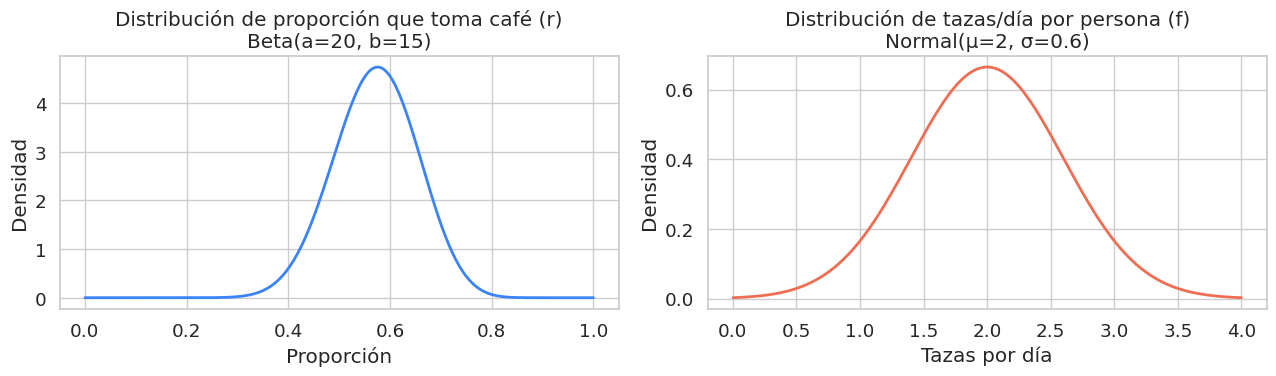


Esperanza matemática: E[T] = 1,142,857 tazas/día
Desviación estándar: SD[T] = 383,681 tazas/día


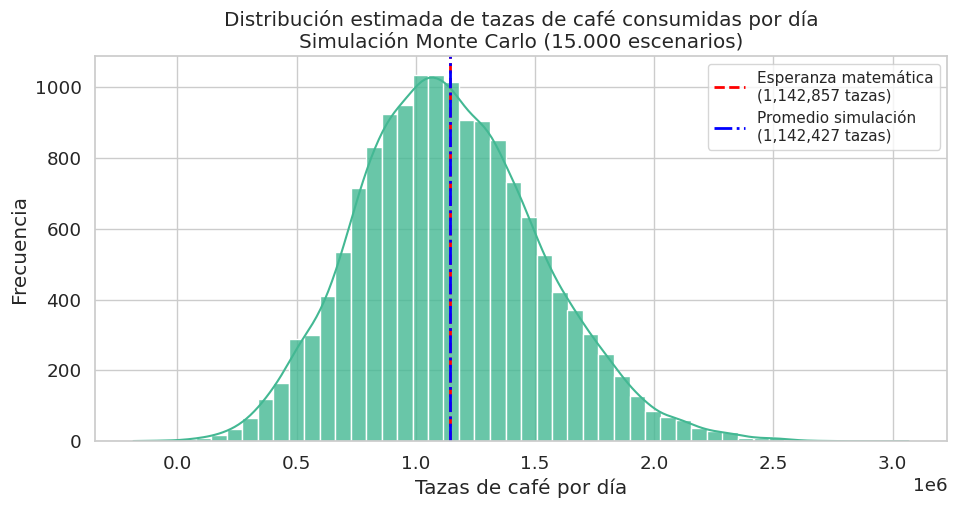

Intervalo de confianza 95%: [448,284, 1,943,350] tazas/día


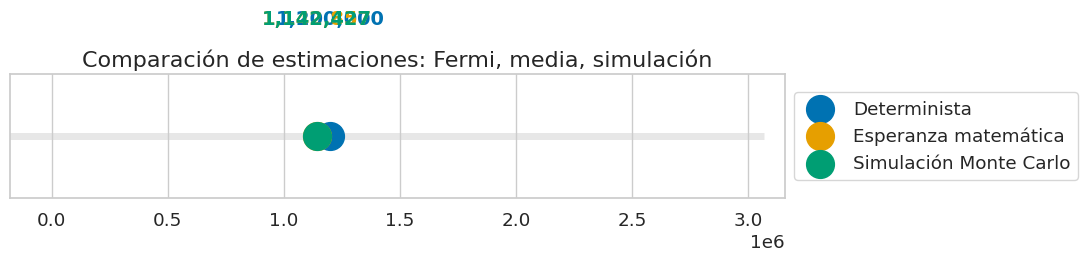

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta, norm

sns.set(style="whitegrid", context="notebook", font_scale=1.2)
np.random.seed(123)

# --- 1. FORMULACIÓN DETERMINISTA (FERMI CLÁSICO) ---
# Supuestos razonables
P = 1_000_000        # habitantes
r = 0.6              # 60% toma café
f = 2                # 2 tazas promedio/persona/día

T_determinista = P * r * f
print(f"Estimación determinista (Fermi): {T_determinista:,.0f} tazas/día")

# --- 2. FORMULACIÓN ESTADÍSTICA (MODELOS DE INCERTIDUMBRE) ---
# P: población se mantiene fija en este ejemplo
# r: Proporción de tomadores de café ~ Beta
a, b = 20, 15   # valores razonables para un beta (media a/(a+b))
# media: 20/35 ~ 0.57

# f: Tazas diarias/persona ~ Normal
mu_f, sigma_f = 2, 0.6 # media 2, desvío típico 0.6

# Visualización de incertidumbre de parámetros
fig, axs = plt.subplots(1,2, figsize=(13,4))
x_r = np.linspace(0,1,300)
axs[0].plot(x_r, beta.pdf(x_r, a, b), color="#3a83fa", lw=2)
axs[0].set_title("Distribución de proporción que toma café (r)\nBeta(a=20, b=15)")
axs[0].set_xlabel("Proporción")
axs[0].set_ylabel("Densidad")

x_f = np.linspace(0, 4, 300)
axs[1].plot(x_f, norm.pdf(x_f, mu_f, sigma_f), color="#ef6d52", lw=2)
axs[1].set_title("Distribución de tazas/día por persona (f)\nNormal(μ=2, σ=0.6)")
axs[1].set_xlabel("Tazas por día")
axs[1].set_ylabel("Densidad")
plt.tight_layout()
plt.show()

# --- 3. ESPERANZA MATEMÁTICA Y VARIANZA ---
E_P = P
E_r = beta.mean(a, b)
E_f = mu_f
Var_r = beta.var(a, b)
Var_f = sigma_f**2

E_T = E_P * E_r * E_f
Var_T = (E_P**2) * (Var_r * (E_f**2) + (E_r**2) * Var_f + Var_r * Var_f)

print(f"\nEsperanza matemática: E[T] = {E_T:,.0f} tazas/día")
print(f"Desviación estándar: SD[T] = {np.sqrt(Var_T):,.0f} tazas/día")

# --- 4. SIMULACIÓN MONTE CARLO: Distribución total de tazas/día ---
n_sim = 15_000
r_samples = beta.rvs(a, b, size=n_sim)
f_samples = norm.rvs(mu_f, sigma_f, size=n_sim)
T_samples = P * r_samples * f_samples

# Visualización: Histograma de la estimación total
plt.figure(figsize=(11,5))
sns.histplot(T_samples, bins=50, color='#43b893', alpha=0.8, kde=True)
plt.axvline(E_T, color="red", ls="--", lw=2, label=f'Esperanza matemática\n({E_T:,.0f} tazas)')
plt.axvline(np.mean(T_samples), color="blue", ls="-.", lw=2, label=f'Promedio simulación\n({np.mean(T_samples):,.0f} tazas)')
plt.title("Distribución estimada de tazas de café consumidas por día\nSimulación Monte Carlo (15.000 escenarios)")
plt.xlabel("Tazas de café por día")
plt.ylabel("Frecuencia")
plt.legend(fontsize=11)
plt.show()

# Intervalo de confianza 95%
ic_95 = np.percentile(T_samples, [2.5, 97.5])
print(f"Intervalo de confianza 95%: [{ic_95[0]:,.0f}, {ic_95[1]:,.0f}] tazas/día")

# --- 5. VISUALIZACIÓN RESUMEN FINAL ---
import matplotlib.patches as mpatches
fig, ax = plt.subplots(figsize=(10, 1.6))
parts = [("Determinista", T_determinista, "#0072B2"),
         ("Esperanza matemática", E_T, "#E69F00"),
         ("Simulación Monte Carlo", np.mean(T_samples), "#009E73")]
for i, (nombre, valor, color) in enumerate(parts):
    ax.scatter(valor, 1, s=400, color=color, label=nombre, zorder=10)
    ax.text(valor, 1.1, f"{valor:,.0f}", ha="center", color=color, fontsize=14, weight='bold')
ax.hlines(1, min(T_samples), max(T_samples), color="#bbb", lw=5, zorder=0, alpha=0.35)
ax.set_xlim(min(T_samples)*0.97, max(T_samples)*1.03)
ax.set_yticks([])
ax.set_title("Comparación de estimaciones: Fermi, media, simulación", fontsize=16)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()


In [ ]:
# Importación de librerías necesarias para mostrar HTML en Google Colab
from IPython.display import display, HTML

# --- PLANTILLA HTML CON LA EXPLICACIÓN DEL USO DE LA DISTRIBUCIÓN NORMAL ---
html_normal_explanation = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Uso de la Distribución Normal para Modelar el Consumo</title>
  <!-- Fuentes y Iconos -->
  <link href="https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">

  <!-- Script para renderizar matemáticas con MathJax (Configuración Robusta) -->
  <script>
    window.MathJax = {
      tex: {
        inlineMath: [['$', '$'], ['\\\\(', '\\\\)']],
        displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']],
        processEscapes: true,
        processEnvironments: true
      },
      svg: {
        fontCache: 'global'
      }
    };
  </script>
  <script src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js" id="MathJax-script" async></script>

  <style>
    /* --- VARIABLES DE TEMA Y ESTILOS GENERALES --- */
    :root {
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-card: rgba(255, 255, 255, 0.9);
      --bg-content: rgba(248, 250, 252, 0.85);
      --text-primary: #2c3e50;
      --text-secondary: #34495e;
      --accent-primary: #27ae60; /* Verde para un tono estadístico/analítico */
      --border-color: rgba(0, 0, 0, 0.1);
      --shadow-card: 0 10px 30px rgba(0, 0, 0, 0.08);
      --particle-color: rgba(0, 0, 0, 0.1);
      --transition: all 0.4s ease;
      --border-radius: 15px;
    }
    [data-theme="dark"] {
      --bg-primary: linear-gradient(135deg, #0f2027 0%, #203a43 50%, #2c5364 100%);
      --bg-card: rgba(26, 32, 44, 0.85);
      --bg-content: rgba(45, 55, 72, 0.8);
      --text-primary: #ecf0f1;
      --text-secondary: #bdc3c7;
      --accent-primary: #2ecc71; /* Verde más brillante para tema oscuro */
      --border-color: rgba(255, 255, 255, 0.15);
      --shadow-card: 0 10px 30px rgba(0, 0, 0, 0.25);
      --particle-color: rgba(255, 255, 255, 0.1);
    }
    * { margin: 0; padding: 0; box-sizing: border-box; }
    html { scroll-behavior: smooth; }
    body { font-family: 'Poppins', sans-serif; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; padding: 1rem; }
    .particles { position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }
    .particle { position: absolute; border-radius: 50%; background: var(--particle-color); animation: float 25s infinite linear; opacity: 0; }
    @keyframes float { 0% { transform: translateY(100vh); opacity: 0; } 10%, 90% { opacity: 1; } 100% { transform: translateY(-10vh); opacity: 0; } }
    .main-container { max-width: 850px; margin: 2rem auto; }
    .theme-toggle { position: fixed; top: 1.5rem; right: 1.5rem; width: 50px; height: 50px; border-radius: 50%; background: var(--bg-card); backdrop-filter: blur(10px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.2rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; border: 1px solid var(--border-color); }
    .theme-toggle:hover { transform: scale(1.1) rotate(180deg); }
    .main-title { text-align: center; font-weight: 700; font-size: 2.2em; margin-bottom: 2.5rem; }
    .topic-card { background: var(--bg-card); backdrop-filter: blur(15px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 1px solid var(--border-color); margin-bottom: 1.5rem; overflow: hidden; transition: var(--transition); }
    .topic-header { cursor: pointer; padding: 1.25rem 1.75rem; display: flex; justify-content: space-between; align-items: center; }
    .topic-title { font-size: 1.2em; font-weight: 600; }
    .expand-icon { font-size: 1.1rem; color: var(--text-secondary); transition: transform 0.4s ease; }
    .topic-card.active .expand-icon { transform: rotate(180deg); color: var(--accent-primary); }
    .topic-content { max-height: 0; overflow: hidden; transition: max-height 1.2s ease, padding 1.2s ease; background: var(--bg-content); border-top: 1px solid transparent; }
    .topic-card.active .topic-content { max-height: 1500px; padding: 1.75rem 2rem; border-top-color: var(--border-color); }
    .topic-content p, .topic-content li { line-height: 1.8; color: var(--text-secondary); margin-bottom: 1rem; }
    .topic-content ul { list-style-position: inside; padding-left: 10px; }
    .topic-content h4 { font-size: 1.1em; color: var(--text-primary); margin: 1.5rem 0 1rem 0; border-left: 3px solid var(--accent-primary); padding-left: 10px; }
    .topic-content blockquote { border-left: 4px solid var(--accent-primary); margin: 1.5rem 0; padding: 1rem 1.5rem; background: rgba(127, 140, 141, 0.05); border-radius: 0 8px 8px 0; font-style: italic; }
    .footer { text-align: center; margin-top: 3rem; padding-top: 1.5rem; font-style: italic; color: var(--text-secondary); font-size: 0.9em; opacity: 0.8; }
  </style>
</head>
<body data-theme="dark">

  <div class="particles" id="particles-container"></div>
  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>

  <div class="main-container">
    <h1 class="main-title">Por Qué Usar la Distribución Normal</h1>

    <!-- Tarjeta 1: Naturaleza de la Variable -->
    <div class="topic-card">
      <div class="topic-header">
        <span class="topic-title">1. Naturaleza de la Variable</span>
        <i class="fas fa-chevron-down expand-icon"></i>
      </div>
      <div class="topic-content">
        <p>La variable $f$ ("tazas de café por persona por día") es cuantitativa, continua y se centra alrededor de un valor típico (por ejemplo, 2 tazas).</p>
        <blockquote>El consumo de café fluctúa alrededor de un promedio, con algunas personas tomando menos y otras más. Este patrón simétrico y unimodal encaja muy bien con la <strong>forma de campana</strong> de la distribución normal.</blockquote>
      </div>
    </div>

    <!-- Tarjeta 2: Teorema Central del Límite -->
    <div class="topic-card">
      <div class="topic-header">
        <span class="topic-title">2. Teorema Central del Límite (TCL)</span>
        <i class="fas fa-chevron-down expand-icon"></i>
      </div>
      <div class="topic-content">
        <p>El TCL sugiere que cuando un comportamiento resulta de la suma o promedio de muchos factores pequeños e independientes (gusto, rutina, salud, trabajo, clima, etc.), su distribución tiende a ser normal.</p>
        <blockquote>El número de tazas por persona es el resultado de múltiples factores aleatorios, lo que respalda el uso de la distribución normal como una aproximación sólida.</blockquote>
      </div>
    </div>

    <!-- Tarjeta 3: Simplicidad -->
    <div class="topic-card">
      <div class="topic-header">
        <span class="topic-title">3. Simplicidad y Capacidad Descriptiva</span>
        <i class="fas fa-chevron-down expand-icon"></i>
      </div>
      <div class="topic-content">
        <h4>La distribución normal es una herramienta eficiente porque:</h4>
        <ul>
            <li>Es fácil de manejar matemáticamente.</li>
            <li>Tiene parámetros muy intuitivos: la <strong>media</strong> (centro) y la <strong>desviación estándar</strong> (dispersión).</li>
            <li>Permite calcular probabilidades, intervalos de confianza y simular datos de forma sencilla.</li>
        </ul>
      </div>
    </div>

    <!-- Tarjeta 4: Adecuación Práctica -->
    <div class="topic-card">
      <div class="topic-header">
        <span class="topic-title">4. Flexibilidad y Adecuación Práctica</span>
        <i class="fas fa-chevron-down expand-icon"></i>
      </div>
      <div class="topic-content">
        <p>Aunque el número de tazas no puede ser negativo, y la normal teóricamente sí lo permite, este es un problema menor en la práctica.</p>
        <blockquote>Con una media de 2 y una desviación estándar baja (ej. 0.6), la probabilidad de obtener valores negativos es casi nula. Por lo tanto, se puede ignorar este detalle sin una pérdida significativa de realismo, a cambio de mantener la simplicidad del modelo.</blockquote>
      </div>
    </div>

    <!-- Tarjeta 5: Alternativas -->
    <div class="topic-card">
        <div class="topic-header">
          <span class="topic-title">5. Alternativas Posibles</span>
          <i class="fas fa-chevron-down expand-icon"></i>
        </div>
        <div class="topic-content">
          <p>Si los datos reales mostraran una asimetría clara (sesgo) o colas pesadas, se podrían usar otras distribuciones:</p>
          <ul>
              <li>Distribución Gamma</li>
              <li>Distribución Log-Normal</li>
              <li>Distribución de Poisson truncada (si la variable fuera discreta)</li>
          </ul>
          <p>Sin embargo, para un problema de estimación general donde se asume que el consumo está bien centrado y la variabilidad es moderada, la normal es una elección adecuada y suficiente.</p>
        </div>
      </div>

    <!-- Tarjeta 6: Conclusión -->
    <div class="topic-card">
        <div class="topic-header">
          <span class="topic-title">6. Conclusión y Concepto Clave</span>
          <i class="fas fa-chevron-down expand-icon"></i>
        </div>
        <div class="topic-content">
          <h4>Resumen Final</h4>
          <p>Se usa la distribución normal para modelar el consumo de café porque esta variable es continua, tiene un comportamiento promedio con variabilidad moderada y responde a múltiples factores independientes. Esto se ajusta bien a la forma simétrica de la normal y permite cálculos eficientes sin sacrificar realismo en este contexto.</p>
          <h4>Concepto Clave</h4>
          <blockquote>La distribución normal es apropiada para modelar variables continuas que están centradas alrededor de un promedio y son afectadas por múltiples influencias pequeñas, especialmente cuando su variabilidad es baja y no presentan un sesgo extremo.</blockquote>
        </div>
    </div>

    <div class="footer"><p>Explicación generada con base en las mejores prácticas de visualización interactiva.</p></div>
  </div>

  <script>
    (function() {
        // --- LÓGICA DEL BOTÓN DE TEMA ---
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;
        function setTheme(theme) {
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) { themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }
        }
        themeToggleButton.addEventListener('click', () => {
            const newTheme = (bodyEl.getAttribute('data-theme') || 'dark') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        });
        setTheme(localStorage.getItem('theme') || 'dark');

        // --- LÓGICA DEL ACORDEÓN (CORREGIDA) ---
        document.querySelectorAll('.topic-header').forEach(header => {
            header.addEventListener('click', () => {
                const card = header.parentElement;
                const wasActive = card.classList.contains('active');
                document.querySelectorAll('.topic-card').forEach(c => c.classList.remove('active'));
                if (!wasActive) {
                    card.classList.add('active');
                    if (window.MathJax && card.querySelector('.topic-content')) {
                        MathJax.typesetPromise([card.querySelector('.topic-content')]).catch(err => console.log('MathJax typeset error:', err));
                    }
                }
            });
        });

        // --- GENERADOR DE PARTÍCULAS ---
        const particlesContainer = document.getElementById('particles-container');
        if (particlesContainer) {
            for (let i = 0; i < 30; i++) {
                const p = document.createElement('div');
                p.className = 'particle';
                p.style.left = Math.random() * 100 + 'vw';
                const size = (Math.random() * 4 + 2);
                p.style.width = size + 'px'; p.style.height = size + 'px';
                p.style.animationDelay = Math.random() * -20 + 's';
                p.style.animationDuration = (15 + Math.random() * 10) + 's';
                particlesContainer.appendChild(p);
            }
        }

        // --- ESTADO INICIAL ---
        const firstCard = document.querySelector('.topic-card');
        if (firstCard) {
            firstCard.classList.add('active');
            setTimeout(() => {
                if (window.MathJax && firstCard.querySelector('.topic-content')) {
                    MathJax.typesetPromise([firstCard.querySelector('.topic-content')]).catch(err => console.log('MathJax initial typeset error:', err));
                }
            }, 100);
        }
    })();
  </script>

</body>
</html>
"""

# Renderizar el HTML final en la salida de la celda de Google Colab
display(HTML(html_normal_explanation))

In [ ]:
# Importación de librerías necesarias para mostrar HTML en Google Colab
from IPython.display import display, HTML

# --- PLANTILLA HTML CON LA INTERPRETACIÓN DE LOS RESULTADOS ESTADÍSTICOS ---
html_interpretation = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Interpretación de Resultados Estadísticos</title>
  <!-- Fuentes y Iconos -->
  <link href="https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">

  <!-- Script para renderizar matemáticas con MathJax (Configuración Robusta) -->
  <script>
    window.MathJax = {
      tex: {
        inlineMath: [['$', '$'], ['\\\\(', '\\\\)']],
        displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']],
        processEscapes: true,
        processEnvironments: true
      },
      svg: {
        fontCache: 'global'
      }
    };
  </script>
  <script src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js" id="MathJax-script" async></script>

  <style>
    /* --- VARIABLES DE TEMA Y ESTILOS GENERALES --- */
    :root {
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-card: rgba(255, 255, 255, 0.9);
      --bg-content: rgba(248, 250, 252, 0.85);
      --text-primary: #2c3e50;
      --text-secondary: #34495e;
      --accent-primary: #e67e22; /* Naranja/Ámbar para un tono de resultado/análisis */
      --border-color: rgba(0, 0, 0, 0.1);
      --shadow-card: 0 10px 30px rgba(0, 0, 0, 0.08);
      --particle-color: rgba(0, 0, 0, 0.1);
      --transition: all 0.4s ease;
      --border-radius: 15px;
    }
    [data-theme="dark"] {
      --bg-primary: linear-gradient(135deg, #0f2027 0%, #203a43 50%, #2c5364 100%);
      --bg-card: rgba(26, 32, 44, 0.85);
      --bg-content: rgba(45, 55, 72, 0.8);
      --text-primary: #ecf0f1;
      --text-secondary: #bdc3c7;
      --accent-primary: #f39c12; /* Naranja más brillante para tema oscuro */
      --border-color: rgba(255, 255, 255, 0.15);
      --shadow-card: 0 10px 30px rgba(0, 0, 0, 0.25);
      --particle-color: rgba(255, 255, 255, 0.1);
    }
    * { margin: 0; padding: 0; box-sizing: border-box; }
    html { scroll-behavior: smooth; }
    body { font-family: 'Poppins', sans-serif; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; padding: 1rem; }
    .particles { position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }
    .particle { position: absolute; border-radius: 50%; background: var(--particle-color); animation: float 25s infinite linear; opacity: 0; }
    @keyframes float { 0% { transform: translateY(100vh); opacity: 0; } 10%, 90% { opacity: 1; } 100% { transform: translateY(-10vh); opacity: 0; } }
    .main-container { max-width: 850px; margin: 2rem auto; }
    .theme-toggle { position: fixed; top: 1.5rem; right: 1.5rem; width: 50px; height: 50px; border-radius: 50%; background: var(--bg-card); backdrop-filter: blur(10px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.2rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; border: 1px solid var(--border-color); }
    .theme-toggle:hover { transform: scale(1.1) rotate(180deg); }
    .main-title { text-align: center; font-weight: 700; font-size: 2.2em; margin-bottom: 2.5rem; }
    .topic-card { background: var(--bg-card); backdrop-filter: blur(15px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 1px solid var(--border-color); margin-bottom: 1.5rem; overflow: hidden; transition: var(--transition); }
    .topic-header { cursor: pointer; padding: 1.25rem 1.75rem; display: flex; justify-content: space-between; align-items: center; }
    .topic-title { font-size: 1.2em; font-weight: 600; }
    .expand-icon { font-size: 1.1rem; color: var(--text-secondary); transition: transform 0.4s ease; }
    .topic-card.active .expand-icon { transform: rotate(180deg); color: var(--accent-primary); }
    .topic-content { max-height: 0; overflow: hidden; transition: max-height 1.2s ease, padding 1.2s ease; background: var(--bg-content); border-top: 1px solid transparent; }
    .topic-card.active .topic-content { max-height: 2000px; padding: 1.75rem 2rem; border-top-color: var(--border-color); }
    .topic-content p, .topic-content li { line-height: 1.8; color: var(--text-secondary); margin-bottom: 1rem; }
    .topic-content ul { list-style-position: inside; padding-left: 10px; }
    .topic-content h4 { font-size: 1.1em; color: var(--text-primary); margin: 1.5rem 0 1rem 0; border-left: 3px solid var(--accent-primary); padding-left: 10px; }
    .topic-content blockquote { border-left: 4px solid var(--accent-primary); margin: 1.5rem 0; padding: 1rem 1.5rem; background: rgba(127, 140, 141, 0.05); border-radius: 0 8px 8px 0; font-style: italic; }
    .formula-block { padding: 1.25rem; background: rgba(0,0,0,0.03); border: 1px solid var(--border-color); border-radius: 8px; text-align: center; overflow-x: auto; margin: 1.5rem 0; font-size: 1.1em; }
    [data-theme="dark"] .formula-block { background: rgba(0,0,0,0.2); }
    .table-container { overflow-x: auto; margin: 1.5rem 0; border-radius: 8px; border: 1px solid var(--border-color); }
    table { width: 100%; border-collapse: collapse; }
    th, td { padding: 12px 15px; text-align: left; border-bottom: 1px solid var(--border-color); }
    th { background: rgba(0,0,0,0.02); font-weight: 600; }
    [data-theme="dark"] th { background: rgba(255,255,255,0.05); }
    tr:last-child td { border-bottom: none; }
    .footer { text-align: center; margin-top: 3rem; padding-top: 1.5rem; font-style: italic; color: var(--text-secondary); font-size: 0.9em; opacity: 0.8; }
  </style>
</head>
<body data-theme="dark">

  <div class="particles" id="particles-container"></div>
  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>

  <div class="main-container">
    <h1 class="main-title">Interpretación: Esperanza y Desviación Estándar</h1>

    <!-- Tarjeta 1: Esperanza Matemática -->
    <div class="topic-card">
      <div class="topic-header">
        <span class="topic-title">1. Esperanza Matemática: $E[T] = 1,142,857$</span>
        <i class="fas fa-chevron-down expand-icon"></i>
      </div>
      <div class="topic-content">
        <p>La esperanza matemática (o valor esperado) es el <strong>promedio teórico</strong> del número de tazas que se consumirían si repitiéramos nuestro escenario infinitas veces.</p>
        <blockquote>Es la <strong>mejor estimación puntual</strong> del resultado, promediando toda la incertidumbre de los parámetros variables (proporción de bebedores $r$ y consumo por persona $f$).</blockquote>
        <h4>Cálculo Matemático</h4>
        <div class="formula-block">$$ E[T] = P \\cdot E[r] \\cdot E[f] $$</div>
        <ul>
            <li>$P = 1,000,000$ (fijo)</li>
            <li>$E[r] = \\frac{\\alpha}{\\alpha+\\beta} = \\frac{20}{35} \\approx 0.5714$</li>
            <li>$E[f] = 2$</li>
        </ul>
        <div class="formula-block">$$ E[T] = 1,000,000 \\cdot 0.5714 \\cdot 2 \\approx 1,142,857 \\text{ tazas/día} $$</div>
      </div>
    </div>

    <!-- Tarjeta 2: Desviación Estándar -->
    <div class="topic-card">
      <div class="topic-header">
        <span class="topic-title">2. Desviación Estándar: $SD[T] = 383,681$</span>
        <i class="fas fa-chevron-down expand-icon"></i>
      </div>
      <div class="topic-content">
        <p>La desviación estándar es una medida de dispersión. Nos dice cuánto varía típicamente la cantidad total de tazas respecto a su valor esperado.</p>
        <blockquote>Representa la <strong>incertidumbre total</strong> del modelo. Un valor alto significa que la estimación diaria es muy variable. En este caso, el total puede desviarse típicamente en ±380,000 tazas del promedio.</blockquote>
        <h4>Cálculo Matemático</h4>
        <p>Se obtiene a partir de la raíz cuadrada de la varianza total ($Var[T]$):</p>
        <div class="formula-block">$$ SD[T] = \\sqrt{Var[T]} $$</div>
        <p>Donde la varianza del producto de variables aleatorias independientes se calcula así:</p>
        <div class="formula-block">$$ Var[T] = P^2 \\cdot (Var[r]E[f]^2 + E[r]^2Var[f] + Var[r]Var[f]) $$</div>
      </div>
    </div>

    <!-- Tarjeta 3: Significado Conjunto -->
    <div class="topic-card">
      <div class="topic-header">
        <span class="topic-title">3. Significado Conjunto y Conclusión</span>
        <i class="fas fa-chevron-down expand-icon"></i>
      </div>
      <div class="topic-content">
        <h4>Resumen Práctico</h4>
        <div class="table-container">
            <table>
                <thead>
                    <tr><th>Valor</th><th>Interpretación Práctica</th></tr>
                </thead>
                <tbody>
                    <tr><td>$E[T] \\approx 1.14$ millones</td><td>Estimación puntual promedio del consumo diario.</td></tr>
                    <tr><td>$SD[T] \\approx 0.38$ millones</td><td>Rango típico de variabilidad o incertidumbre alrededor de la media.</td></tr>
                </tbody>
            </table>
        </div>
        <h4>Rango de Confianza (Aproximado)</h4>
        <p>Podemos interpretar que, en un día cualquiera, es razonable esperar que el consumo esté aproximadamente en el rango de una desviación estándar alrededor de la media (intervalo de confianza del ~68%):</p>
        <div class="formula-block">$$ 1.14 \\text{ millones} \\pm 0.38 \\text{ millones} \\Rightarrow [760,000, \\; 1,520,000] \\text{ tazas/día} $$</div>

        <h4>Conclusión Final</h4>
        <p>La esperanza matemática (1,142,857) es el promedio teórico del consumo diario. La desviación estándar (383,681) mide cuánta variación existe en torno a ese promedio. Juntos, no solo dan una estimación, sino que también cuantifican el grado de confianza e incertidumbre de esa predicción.</p>

        <h4>Concepto Clave</h4>
        <blockquote>La esperanza matemática cuantifica el promedio teórico de una variable aleatoria, mientras que la desviación estándar mide su variabilidad. Ambas son esenciales para comprender y comunicar la incertidumbre en modelos estadísticos.</blockquote>
      </div>
    </div>

    <div class="footer"><p>Explicación generada con base en las mejores prácticas de visualización interactiva.</p></div>
  </div>

  <script>
    (function() {
        // --- LÓGICA DEL BOTÓN DE TEMA ---
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;
        function setTheme(theme) {
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) { themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }
        }
        themeToggleButton.addEventListener('click', () => {
            const newTheme = (bodyEl.getAttribute('data-theme') || 'dark') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        });
        setTheme(localStorage.getItem('theme') || 'dark');

        // --- LÓGICA DEL ACORDEÓN (CORREGIDA) ---
        document.querySelectorAll('.topic-header').forEach(header => {
            header.addEventListener('click', () => {
                const card = header.parentElement;
                const wasActive = card.classList.contains('active');
                document.querySelectorAll('.topic-card').forEach(c => c.classList.remove('active'));
                if (!wasActive) {
                    card.classList.add('active');
                    if (window.MathJax && card.querySelector('.topic-content')) {
                        MathJax.typesetPromise([card.querySelector('.topic-content')]).catch(err => console.log('MathJax typeset error:', err));
                    }
                }
            });
        });

        // --- GENERADOR DE PARTÍCULAS ---
        const particlesContainer = document.getElementById('particles-container');
        if (particlesContainer) {
            for (let i = 0; i < 30; i++) {
                const p = document.createElement('div');
                p.className = 'particle';
                p.style.left = Math.random() * 100 + 'vw';
                const size = (Math.random() * 4 + 2);
                p.style.width = size + 'px'; p.style.height = size + 'px';
                p.style.animationDelay = Math.random() * -20 + 's';
                p.style.animationDuration = (15 + Math.random() * 10) + 's';
                particlesContainer.appendChild(p);
            }
        }

        // --- ESTADO INICIAL ---
        const firstCard = document.querySelector('.topic-card');
        if (firstCard) {
            firstCard.classList.add('active');
            setTimeout(() => {
                if (window.MathJax && firstCard.querySelector('.topic-content')) {
                    MathJax.typesetPromise([firstCard.querySelector('.topic-content')]).catch(err => console.log('MathJax initial typeset error:', err));
                }
            }, 100);
        }
    })();
  </script>

</body>
</html>
"""

# Renderizar el HTML final en la salida de la celda de Google Colab
display(HTML(html_interpretation))

Valor,Interpretación Práctica
$E[T] \approx 1.14$ millones,Estimación puntual promedio del consumo diario.
$SD[T] \approx 0.38$ millones,Rango típico de variabilidad o incertidumbre alrededor de la media.


In [ ]:
# Importación de librerías necesarias para mostrar HTML en Google Colab
from IPython.display import display, HTML

# --- PLANTILLA HTML CON LA EXPLICACIÓN DE LA SIMULACIÓN DE MONTE CARLO ---
html_monte_carlo = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Simulación de Monte Carlo</title>
  <!-- Fuentes y Iconos -->
  <link href="https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">

  <!-- Script para renderizar matemáticas con MathJax (Configuración Robusta) -->
  <script>
    window.MathJax = {
      tex: {
        inlineMath: [['$', '$'], ['\\\\(', '\\\\)']],
        displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']],
        processEscapes: true,
        processEnvironments: true
      },
      svg: {
        fontCache: 'global'
      }
    };
  </script>
  <script src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js" id="MathJax-script" async></script>

  <style>
    /* --- VARIABLES DE TEMA Y ESTILOS GENERALES --- */
    :root {
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-card: rgba(255, 255, 255, 0.9);
      --bg-content: rgba(248, 250, 252, 0.85);
      --text-primary: #2c3e50;
      --text-secondary: #34495e;
      --accent-primary: #c0392b; /* Rojo para un tono de simulación/análisis */
      --border-color: rgba(0, 0, 0, 0.1);
      --shadow-card: 0 10px 30px rgba(0, 0, 0, 0.08);
      --particle-color: rgba(0, 0, 0, 0.1);
      --transition: all 0.4s ease;
      --border-radius: 15px;
    }
    [data-theme="dark"] {
      --bg-primary: linear-gradient(135deg, #0f2027 0%, #203a43 50%, #2c5364 100%);
      --bg-card: rgba(26, 32, 44, 0.85);
      --bg-content: rgba(45, 55, 72, 0.8);
      --text-primary: #ecf0f1;
      --text-secondary: #bdc3c7;
      --accent-primary: #e74c3c; /* Rojo más brillante para tema oscuro */
      --border-color: rgba(255, 255, 255, 0.15);
      --shadow-card: 0 10px 30px rgba(0, 0, 0, 0.25);
      --particle-color: rgba(255, 255, 255, 0.1);
    }
    * { margin: 0; padding: 0; box-sizing: border-box; }
    html { scroll-behavior: smooth; }
    body { font-family: 'Poppins', sans-serif; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; padding: 1rem; }
    .particles { position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }
    .particle { position: absolute; border-radius: 50%; background: var(--particle-color); animation: float 25s infinite linear; opacity: 0; }
    @keyframes float { 0% { transform: translateY(100vh); opacity: 0; } 10%, 90% { opacity: 1; } 100% { transform: translateY(-10vh); opacity: 0; } }
    .main-container { max-width: 850px; margin: 2rem auto; }
    .theme-toggle { position: fixed; top: 1.5rem; right: 1.5rem; width: 50px; height: 50px; border-radius: 50%; background: var(--bg-card); backdrop-filter: blur(10px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.2rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; border: 1px solid var(--border-color); }
    .theme-toggle:hover { transform: scale(1.1) rotate(180deg); }
    .main-title { text-align: center; font-weight: 700; font-size: 2.2em; margin-bottom: 2.5rem; }
    .topic-card { background: var(--bg-card); backdrop-filter: blur(15px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 1px solid var(--border-color); margin-bottom: 1.5rem; overflow: hidden; transition: var(--transition); }
    .topic-header { cursor: pointer; padding: 1.25rem 1.75rem; display: flex; justify-content: space-between; align-items: center; }
    .topic-title { font-size: 1.2em; font-weight: 600; }
    .expand-icon { font-size: 1.1rem; color: var(--text-secondary); transition: transform 0.4s ease; }
    .topic-card.active .expand-icon { transform: rotate(180deg); color: var(--accent-primary); }
    .topic-content { max-height: 0; overflow: hidden; transition: max-height 1.2s ease, padding 1.2s ease; background: var(--bg-content); border-top: 1px solid transparent; }
    .topic-card.active .topic-content { max-height: 2000px; padding: 1.75rem 2rem; border-top-color: var(--border-color); }
    .topic-content p, .topic-content li { line-height: 1.8; color: var(--text-secondary); margin-bottom: 1rem; }
    .topic-content ul { list-style-position: inside; padding-left: 10px; }
    .topic-content h4 { font-size: 1.1em; color: var(--text-primary); margin: 1.5rem 0 1rem 0; border-left: 3px solid var(--accent-primary); padding-left: 10px; }
    .topic-content blockquote { border-left: 4px solid var(--accent-primary); margin: 1.5rem 0; padding: 1rem 1.5rem; background: rgba(127, 140, 141, 0.05); border-radius: 0 8px 8px 0; font-style: italic; }
    .formula-block { padding: 1.25rem; background: rgba(0,0,0,0.03); border: 1px solid var(--border-color); border-radius: 8px; text-align: center; overflow-x: auto; margin: 1.5rem 0; font-size: 1.1em; }
    [data-theme="dark"] .formula-block { background: rgba(0,0,0,0.2); }
    .table-container { overflow-x: auto; margin: 1.5rem 0; border-radius: 8px; border: 1px solid var(--border-color); }
    table { width: 100%; border-collapse: collapse; }
    th, td { padding: 12px 15px; text-align: left; border-bottom: 1px solid var(--border-color); }
    th { background: rgba(0,0,0,0.02); font-weight: 600; }
    [data-theme="dark"] th { background: rgba(255,255,255,0.05); }
    tr:last-child td { border-bottom: none; }
    .footer { text-align: center; margin-top: 3rem; padding-top: 1.5rem; font-style: italic; color: var(--text-secondary); font-size: 0.9em; opacity: 0.8; }
  </style>
</head>
<body data-theme="dark">

  <div class="particles" id="particles-container"></div>
  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>

  <div class="main-container">
    <h1 class="main-title">Simulación de Monte Carlo</h1>

    <!-- Tarjeta 1: Definición y Fundamento -->
    <div class="topic-card">
      <div class="topic-header">
        <span class="topic-title">1. ¿Qué es y cuál es su Fundamento?</span>
        <i class="fas fa-chevron-down expand-icon"></i>
      </div>
      <div class="topic-content">
        <h4>Definición</h4>
        <p>La Simulación de Monte Carlo es una técnica que consiste en generar múltiples escenarios aleatorios para modelar fenómenos complejos. En lugar de usar solo fórmulas, utiliza el muestreo aleatorio repetido para construir la distribución de resultados posibles.</p>
        <h4>Fundamento Estadístico</h4>
        <p>Si un resultado depende de parámetros inciertos, y conocemos la distribución de probabilidad de esos parámetros, podemos:</p>
        <ul>
            <li>Generar valores aleatorios (muestras) de cada parámetro según su distribución.</li>
            <li>Calcular el resultado del modelo para cada conjunto de valores.</li>
            <li>Repetir este proceso miles de veces (ej. 15,000).</li>
            <li>Analizar la distribución de todos los resultados obtenidos.</li>
        </ul>
      </div>
    </div>

    <!-- Tarjeta 2: Relación con Machine Learning -->
    <div class="topic-card">
      <div class="topic-header">
        <span class="topic-title">2. Relación con Machine Learning (ML)</span>
        <i class="fas fa-chevron-down expand-icon"></i>
      </div>
      <div class="topic-content">
        <p>Monte Carlo y ML están estrechamente relacionados en varios aspectos:</p>
        <div class="table-container">
            <table>
                <thead>
                    <tr><th>Simulación de Monte Carlo</th><th>Machine Learning</th></tr>
                </thead>
                <tbody>
                    <tr><td>Modela la incertidumbre mediante simulación.</td><td>Aprende patrones a partir de datos.</td></tr>
                    <tr><td>Evalúa miles de escenarios posibles.</td><td>Evalúa predicciones bajo distintas condiciones.</td></tr>
                </tbody>
            </table>
        </div>
        <blockquote>Muchos algoritmos de ML, especialmente los bayesianos o las redes neuronales probabilísticas, utilizan variantes de Monte Carlo para estimar la incertidumbre en los parámetros del modelo. También se usa en validación cruzada, generación de datos sintéticos y estimación de errores.</blockquote>
      </div>
    </div>

    <!-- Tarjeta 3: Aplicación Práctica -->
    <div class="topic-card">
      <div class="topic-header">
        <span class="topic-title">3. Aplicación Práctica en el Código</span>
        <i class="fas fa-chevron-down expand-icon"></i>
      </div>
      <div class="topic-content">
        <p>El código modela dos parámetros como variables aleatorias:</p>
        <ul>
            <li>$r$: Proporción de personas que toman café $\\rightarrow Beta(20, 15)$</li>
            <li>$f$: Tazas por persona por día $\\rightarrow N(2, 0.6)$</li>
        </ul>
        <h4>Proceso de Simulación:</h4>
        <ol>
            <li>Se generan 15,000 muestras aleatorias de $r$ y 15,000 de $f$.</li>
            <li>Para cada par de muestras $(r_i, f_i)$, se calcula un posible total diario:</li>
        </ol>
        <div class="formula-block">$$ T_i = P \\cdot r_i \\cdot f_i $$</div>
        <p>Con $P = 1,000,000$. Esto resulta en 15,000 escenarios posibles de consumo diario.</p>
      </div>
    </div>

    <!-- Tarjeta 4: Interpretación de la Imagen -->
    <div class="topic-card">
        <div class="topic-header">
          <span class="topic-title">4. Interpretación de la Imagen Resultante</span>
          <i class="fas fa-chevron-down expand-icon"></i>
        </div>
        <div class="topic-content">
          <p>La gráfica resultante muestra un histograma de las 15,000 simulaciones, con dos líneas verticales clave:</p>
          <ul>
              <li><strong>Línea Roja (Esperanza Teórica):</strong> Calculada analíticamente.</li>
          </ul>
          <div class="formula-block">$$ E[T] = P \\cdot E[r] \\cdot E[f] \\approx 1,142,857 $$</div>
          <ul>
              <li><strong>Línea Azul (Promedio de la Simulación):</strong> El promedio de los 15,000 resultados.</li>
          </ul>
          <div class="formula-block">$$ \\bar{T}_{sim} \\approx 1,142,427 $$</div>
          <blockquote>La cercanía entre ambos valores valida que la simulación se ha realizado correctamente y que el modelo es consistente.</blockquote>
        </div>
      </div>

    <!-- Tarjeta 5: Conclusión -->
    <div class="topic-card">
        <div class="topic-header">
          <span class="topic-title">5. Conclusión y Concepto Clave</span>
          <i class="fas fa-chevron-down expand-icon"></i>
        </div>
        <div class="topic-content">
          <h4>¿Qué Demuestra la Simulación?</h4>
          <ul>
              <li><strong>Visualiza la incertidumbre:</strong> Muestra un rango de resultados posibles, no un único número.</li>
              <li><strong>Valida el modelo analítico:</strong> La coincidencia entre la media teórica y la simulada da confianza en el enfoque.</li>
              <li><strong>Permite obtener intervalos de confianza:</strong> Se puede calcular que el 95% de los escenarios se encuentran entre ~400 mil y ~1.9 millones de tazas.</li>
          </ul>
          <h4>Conclusión Final</h4>
          <p>La Simulación de Monte Carlo permite generar una distribución de posibles escenarios sobre el consumo diario al modelar la incertidumbre en los parámetros. La concordancia entre el resultado de la simulación y el valor teórico esperado valida el enfoque probabilístico.</p>
          <h4>Concepto Clave</h4>
          <blockquote>Monte Carlo simula miles de escenarios posibles mediante muestreo aleatorio para cuantificar la incertidumbre en modelos complejos, conectándose con Machine Learning en tareas de inferencia, validación y optimización probabilística.</blockquote>
        </div>
    </div>

    <div class="footer"><p>Explicación generada con base en las mejores prácticas de visualización interactiva.</p></div>
  </div>

  <script>
    (function() {
        // --- LÓGICA DEL BOTÓN DE TEMA ---
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;
        function setTheme(theme) {
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) { themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }
        }
        themeToggleButton.addEventListener('click', () => {
            const newTheme = (bodyEl.getAttribute('data-theme') || 'dark') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        });
        setTheme(localStorage.getItem('theme') || 'dark');

        // --- LÓGICA DEL ACORDEÓN (CORREGIDA) ---
        document.querySelectorAll('.topic-header').forEach(header => {
            header.addEventListener('click', () => {
                const card = header.parentElement;
                const wasActive = card.classList.contains('active');
                document.querySelectorAll('.topic-card').forEach(c => c.classList.remove('active'));
                if (!wasActive) {
                    card.classList.add('active');
                    if (window.MathJax && card.querySelector('.topic-content')) {
                        MathJax.typesetPromise([card.querySelector('.topic-content')]).catch(err => console.log('MathJax typeset error:', err));
                    }
                }
            });
        });

        // --- GENERADOR DE PARTÍCULAS ---
        const particlesContainer = document.getElementById('particles-container');
        if (particlesContainer) {
            for (let i = 0; i < 30; i++) {
                const p = document.createElement('div');
                p.className = 'particle';
                p.style.left = Math.random() * 100 + 'vw';
                const size = (Math.random() * 4 + 2);
                p.style.width = size + 'px'; p.style.height = size + 'px';
                p.style.animationDelay = Math.random() * -20 + 's';
                p.style.animationDuration = (15 + Math.random() * 10) + 's';
                particlesContainer.appendChild(p);
            }
        }

        // --- ESTADO INICIAL ---
        const firstCard = document.querySelector('.topic-card');
        if (firstCard) {
            firstCard.classList.add('active');
            setTimeout(() => {
                if (window.MathJax && firstCard.querySelector('.topic-content')) {
                    MathJax.typesetPromise([firstCard.querySelector('.topic-content')]).catch(err => console.log('MathJax initial typeset error:', err));
                }
            }, 100);
        }
    })();
  </script>

</body>
</html>
"""

# Renderizar el HTML final en la salida de la celda de Google Colab
display(HTML(html_monte_carlo))

Simulación de Monte Carlo,Machine Learning
Modela la incertidumbre mediante simulación.,Aprende patrones a partir de datos.
Evalúa miles de escenarios posibles.,Evalúa predicciones bajo distintas condiciones.


/tmp/ipython-input-12-541475731.py:66: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


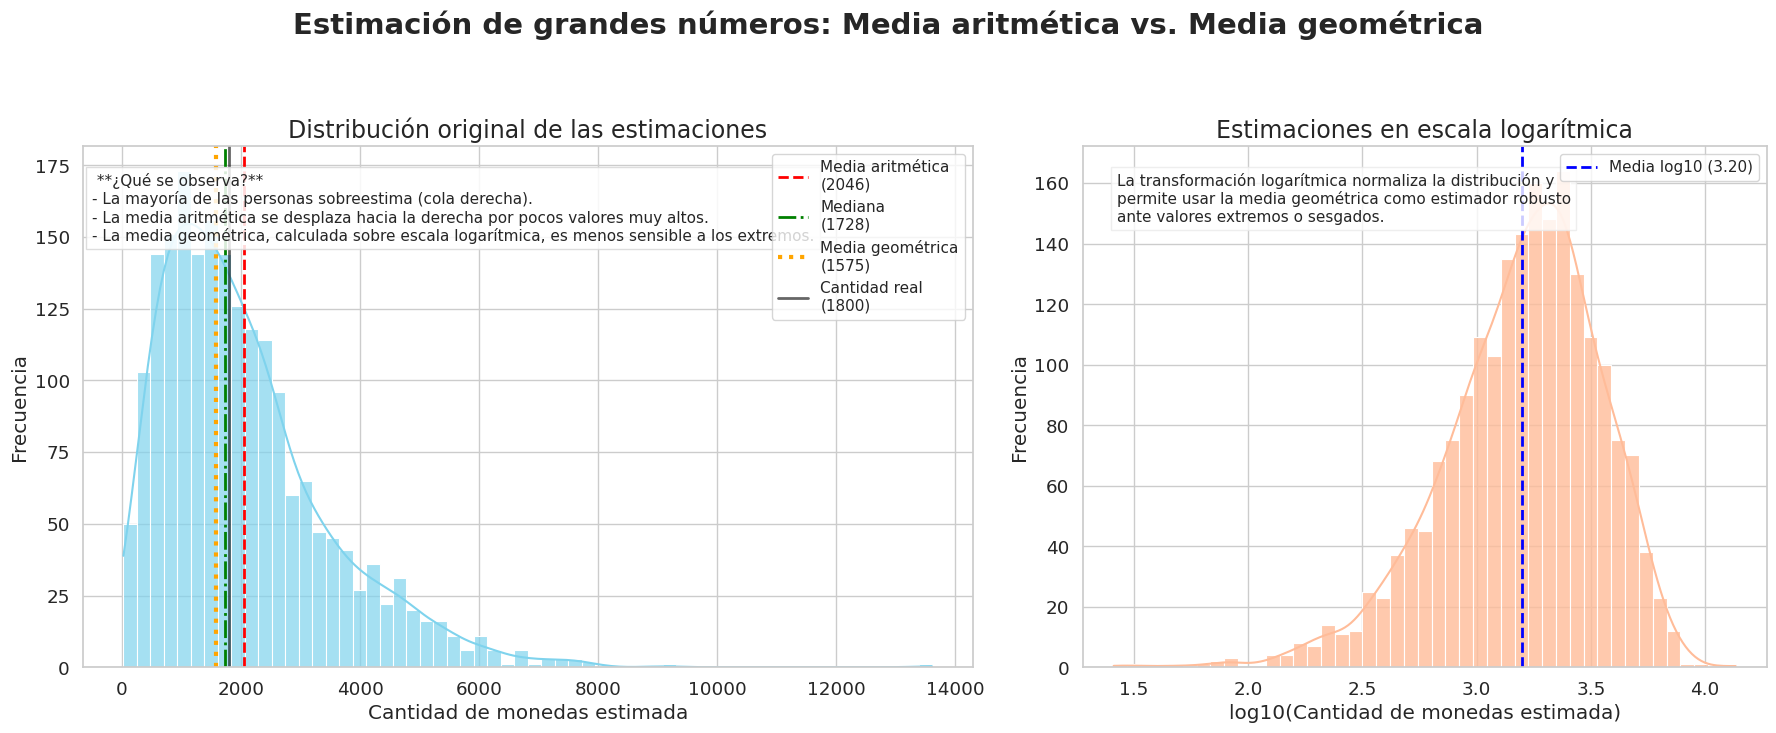

---- Medidas representativas ----
Media aritmética:   2046.04
Media geométrica:   1575.48
Mediana:            1728.33
Moda (aprox):       2735.51
Cantidad real (ficticia): 1800.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---- CONFIGURACIÓN GENERAL DEL GRÁFICO ----
sns.set(style="whitegrid", context="notebook", font_scale=1.2)
np.random.seed(42)

# ---- 1. SIMULACIÓN DEL PROBLEMA ----
# Simula estimaciones de 2000 personas sobre la cantidad de monedas en un frasco.
real_cantidad = 1800  # (Opcional: cantidad real, solo para referencia)
estimaciones = np.random.gamma(shape=2, scale=1000, size=2000)

# ---- 2. CÁLCULO DE MEDIDAS REPRESENTATIVAS ----
media_aritmetica = np.mean(estimaciones)
mediana = np.median(estimaciones)
moda = estimaciones[np.argmax(np.bincount(estimaciones.astype(int)))]
media_log = np.mean(np.log10(estimaciones))
media_geometrica = 10**media_log

# ---- 3. VISUALIZACIÓN MEJORADA ----
fig = plt.figure(constrained_layout=True, figsize=(18, 7))
gs = fig.add_gridspec(1, 2, width_ratios=[1.3, 1])

# (a) Histograma de estimaciones originales
ax1 = fig.add_subplot(gs[0])
sns.histplot(estimaciones, bins=60, kde=True, ax=ax1, color='#7fd3ed', alpha=0.7, edgecolor=None)
ax1.axvline(media_aritmetica, color='red', linestyle='dashed', linewidth=2, label=f'Media aritmética\n({media_aritmetica:.0f})')
ax1.axvline(mediana, color='green', linestyle='-.', linewidth=2, label=f'Mediana\n({mediana:.0f})')
ax1.axvline(media_geometrica, color='orange', linestyle=':', linewidth=3, label=f'Media geométrica\n({media_geometrica:.0f})')
ax1.axvline(real_cantidad, color='black', linestyle='-', linewidth=2, label=f'Cantidad real\n({real_cantidad})', alpha=0.6)
ax1.set_title("Distribución original de las estimaciones", fontsize=17)
ax1.set_xlabel("Cantidad de monedas estimada")
ax1.set_ylabel("Frecuencia")
ax1.legend(fontsize=11, frameon=True, loc='upper right')

# Texto explicativo
explicacion = (
    " **¿Qué se observa?**\n"
    "- La mayoría de las personas sobreestima (cola derecha).\n"
    "- La media aritmética se desplaza hacia la derecha por pocos valores muy altos.\n"
    "- La media geométrica, calculada sobre escala logarítmica, es menos sensible a los extremos."
)
ax1.text(0.01, 0.95, explicacion, transform=ax1.transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.85, edgecolor='#d8d8d8'))

# (b) Histograma de los datos en escala logarítmica
ax2 = fig.add_subplot(gs[1])
estimaciones_log = np.log10(estimaciones)
sns.histplot(estimaciones_log, bins=45, kde=True, ax=ax2, color='#ffbc99', alpha=0.8)
ax2.axvline(media_log, color='blue', linestyle='dashed', linewidth=2, label=f'Media log10 ({media_log:.2f})')
ax2.set_title("Estimaciones en escala logarítmica", fontsize=17)
ax2.set_xlabel("log10(Cantidad de monedas estimada)")
ax2.set_ylabel("Frecuencia")
ax2.legend(fontsize=11, loc='upper right')

# Explicación breve sobre la transformación logarítmica
ax2.text(0.05, 0.95,
         "La transformación logarítmica normaliza la distribución y\n"
         "permite usar la media geométrica como estimador robusto\n"
         "ante valores extremos o sesgados.",
         transform=ax2.transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8, edgecolor='#eaeaea'))

fig.suptitle("Estimación de grandes números: Media aritmética vs. Media geométrica", fontsize=21, weight='bold', y=1.05)
plt.tight_layout()
plt.show()

# ---- 4. IMPRESIÓN DE LOS RESULTADOS ----
print("---- Medidas representativas ----")
print(f"Media aritmética:   {media_aritmetica:.2f}")
print(f"Media geométrica:   {media_geometrica:.2f}")
print(f"Mediana:            {mediana:.2f}")
print(f"Moda (aprox):       {moda:.2f}")
print(f"Cantidad real (ficticia): {real_cantidad:.2f}")


In [ ]:
# Importación de librerías necesarias para mostrar HTML en Google Colab
from IPython.display import display, HTML

# --- PLANTILLA HTML CON LA EXPLICACIÓN SOBRE MEDIA GEOMÉTRICA Y SESGO ---
html_geometric_mean = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Estimación, Sesgo y Media Geométrica</title>
  <!-- Fuentes y Iconos -->
  <link href="https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">

  <!-- Script para renderizar matemáticas con MathJax (Configuración Robusta) -->
  <script>
    window.MathJax = {
      tex: {
        inlineMath: [['$', '$'], ['\\\\(', '\\\\)']],
        displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']],
        processEscapes: true,
        processEnvironments: true
      },
      svg: {
        fontCache: 'global'
      }
    };
  </script>
  <script src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js" id="MathJax-script" async></script>

  <style>
    /* --- VARIABLES DE TEMA Y ESTILOS GENERALES --- */
    :root {
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-card: rgba(255, 255, 255, 0.9);
      --bg-content: rgba(248, 250, 252, 0.85);
      --text-primary: #2c3e50;
      --text-secondary: #34495e;
      --accent-primary: #34495e; /* Gris oscuro para un tono sobrio y académico */
      --border-color: rgba(0, 0, 0, 0.1);
      --shadow-card: 0 10px 30px rgba(0, 0, 0, 0.08);
      --particle-color: rgba(0, 0, 0, 0.1);
      --transition: all 0.4s ease;
      --border-radius: 15px;
    }
    [data-theme="dark"] {
      --bg-primary: linear-gradient(135deg, #0f2027 0%, #203a43 50%, #2c5364 100%);
      --bg-card: rgba(26, 32, 44, 0.85);
      --bg-content: rgba(45, 55, 72, 0.8);
      --text-primary: #ecf0f1;
      --text-secondary: #bdc3c7;
      --accent-primary: #95a5a6; /* Gris claro para tema oscuro */
      --border-color: rgba(255, 255, 255, 0.15);
      --shadow-card: 0 10px 30px rgba(0, 0, 0, 0.25);
      --particle-color: rgba(255, 255, 255, 0.1);
    }
    * { margin: 0; padding: 0; box-sizing: border-box; }
    html { scroll-behavior: smooth; }
    body { font-family: 'Poppins', sans-serif; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; padding: 1rem; }
    .particles { position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }
    .particle { position: absolute; border-radius: 50%; background: var(--particle-color); animation: float 25s infinite linear; opacity: 0; }
    @keyframes float { 0% { transform: translateY(100vh); opacity: 0; } 10%, 90% { opacity: 1; } 100% { transform: translateY(-10vh); opacity: 0; } }
    .main-container { max-width: 850px; margin: 2rem auto; }
    .theme-toggle { position: fixed; top: 1.5rem; right: 1.5rem; width: 50px; height: 50px; border-radius: 50%; background: var(--bg-card); backdrop-filter: blur(10px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.2rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; border: 1px solid var(--border-color); }
    .theme-toggle:hover { transform: scale(1.1) rotate(180deg); }
    .main-title { text-align: center; font-weight: 700; font-size: 2.2em; margin-bottom: 2.5rem; }
    .topic-card { background: var(--bg-card); backdrop-filter: blur(15px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 1px solid var(--border-color); margin-bottom: 1.5rem; overflow: hidden; transition: var(--transition); }
    .topic-header { cursor: pointer; padding: 1.25rem 1.75rem; display: flex; justify-content: space-between; align-items: center; }
    .topic-title { font-size: 1.2em; font-weight: 600; }
    .expand-icon { font-size: 1.1rem; color: var(--text-secondary); transition: transform 0.4s ease; }
    .topic-card.active .expand-icon { transform: rotate(180deg); color: var(--accent-primary); }
    .topic-content { max-height: 0; overflow: hidden; transition: max-height 1.2s ease, padding 1.2s ease; background: var(--bg-content); border-top: 1px solid transparent; }
    .topic-card.active .topic-content { max-height: 2000px; padding: 1.75rem 2rem; border-top-color: var(--border-color); }
    .topic-content p, .topic-content li { line-height: 1.8; color: var(--text-secondary); margin-bottom: 1rem; }
    .topic-content ul { list-style-position: inside; padding-left: 10px; }
    .topic-content h4 { font-size: 1.1em; color: var(--text-primary); margin: 1.5rem 0 1rem 0; border-left: 3px solid var(--accent-primary); padding-left: 10px; }
    .topic-content blockquote { border-left: 4px solid var(--accent-primary); margin: 1.5rem 0; padding: 1rem 1.5rem; background: rgba(127, 140, 141, 0.05); border-radius: 0 8px 8px 0; font-style: italic; }
    .formula-block { padding: 1.25rem; background: rgba(0,0,0,0.03); border: 1px solid var(--border-color); border-radius: 8px; text-align: center; overflow-x: auto; margin: 1.5rem 0; font-size: 1.1em; }
    [data-theme="dark"] .formula-block { background: rgba(0,0,0,0.2); }
    .footer { text-align: center; margin-top: 3rem; padding-top: 1.5rem; font-style: italic; color: var(--text-secondary); font-size: 0.9em; opacity: 0.8; }
  </style>
</head>
<body data-theme="dark">

  <div class="particles" id="particles-container"></div>
  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>

  <div class="main-container">
    <h1 class="main-title">Estimación, Sesgo y Media Geométrica</h1>

    <!-- Tarjeta 1: Introducción -->
    <div class="topic-card">
      <div class="topic-header">
        <span class="topic-title">1. El Problema de la Estimación Colectiva</span>
        <i class="fas fa-chevron-down expand-icon"></i>
      </div>
      <div class="topic-content">
        <p>A menudo debemos estimar cantidades difíciles de observar, como el número de monedas en un frasco. Al pedir a muchas personas que hagan una estimación, aprovechamos la "sabiduría de las masas": la idea de que el promedio de muchas estimaciones individuales puede ser sorprendentemente preciso.</p>
        <blockquote>Sin embargo, en la práctica, estas estimaciones suelen estar <strong>sesgadas</strong>. Es común observar una distribución con una "cola" larga hacia la derecha, donde algunas personas dan estimaciones extremadamente altas.</blockquote>
      </div>
    </div>

    <!-- Tarjeta 2: Media Aritmética -->
    <div class="topic-card">
      <div class="topic-header">
        <span class="topic-title">2. El Problema de la Media Aritmética</span>
        <i class="fas fa-chevron-down expand-icon"></i>
      </div>
      <div class="topic-content">
        <p>La media aritmética es sensible a valores extremos (outliers). En una distribución sesgada, unos pocos valores muy altos tiran del promedio hacia ellos, haciendo que no sea representativo del centro real de los datos.</p>
        <div class="formula-block">$$ \\bar{x} = \\frac{1}{n} \\sum_{i=1}^{n} x_i $$</div>
      </div>
    </div>

    <!-- Tarjeta 3: Transformación Logarítmica -->
    <div class="topic-card">
      <div class="topic-header">
        <span class="topic-title">3. La Transformación Logarítmica como Solución</span>
        <i class="fas fa-chevron-down expand-icon"></i>
      </div>
      <div class="topic-content">
        <p>Para corregir el sesgo, podemos aplicar una transformación logarítmica a los datos:</p>
        <div class="formula-block">$$ y_i = \\log(x_i) $$</div>
        <h4>Efectos de la Transformación:</h4>
        <ul>
            <li>Reduce el impacto de los valores extremos.</li>
            <li>Comprime la escala de los datos.</li>
            <li>Tiende a hacer que una distribución sesgada se vuelva más simétrica (similar a la normal).</li>
        </ul>
      </div>
    </div>

    <!-- Tarjeta 4: Media Geométrica -->
    <div class="topic-card">
        <div class="topic-header">
          <span class="topic-title">4. La Media Geométrica: Una Medida Robusta</span>
          <i class="fas fa-chevron-down expand-icon"></i>
        </div>
        <div class="topic-content">
          <p>La media geométrica es el resultado de promediar los datos en la escala logarítmica y luego revertir la transformación con la función exponencial.</p>
          <div class="formula-block">$$ \\text{Media geométrica} = \\exp\\left(\\frac{1}{n} \\sum_{i=1}^{n} \\log(x_i)\\right) $$</div>
          <p>Esto es matemáticamente equivalente a calcular la raíz n-ésima del producto de todos los valores:</p>
          <div class="formula-block">$$ \\text{Media geométrica} = \\left(\\prod_{i=1}^{n} x_i\\right)^{1/n} $$</div>
          <blockquote>A diferencia de la media aritmética, la media geométrica es mucho menos sensible a los valores extremos, lo que la convierte en una medida de tendencia central más robusta para datos sesgados.</blockquote>
        </div>
    </div>

    <!-- Tarjeta 5: Comparación -->
    <div class="topic-card">
        <div class="topic-header">
          <span class="topic-title">5. Comparación de Medidas Centrales</span>
          <i class="fas fa-chevron-down expand-icon"></i>
        </div>
        <div class="topic-content">
            <h4>Comportamiento ante el Sesgo:</h4>
            <ul>
                <li><strong>En una distribución simétrica:</strong></li>
                <p>Media Aritmética ≈ Mediana ≈ Moda</p>
                <li><strong>En una distribución con sesgo positivo (cola derecha):</strong></li>
                <p>Media Aritmética > Mediana > Media Geométrica</p>
            </ul>
            <p>En el segundo caso, la <strong>Media Geométrica</strong> y la <strong>Mediana</strong> se aproximan mucho más al "centro" verdadero y representativo de la mayoría de los datos.</p>
        </div>
    </div>

    <!-- Tarjeta 6: Conclusión -->
    <div class="topic-card">
        <div class="topic-header">
          <span class="topic-title">6. Aplicaciones, Conclusión y Concepto Clave</span>
          <i class="fas fa-chevron-down expand-icon"></i>
        </div>
        <div class="topic-content">
          <h4>Aplicaciones Prácticas</h4>
          <p>Este enfoque es útil en:</p>
          <ul>
              <li>Estimaciones humanas de cantidades (ej. monedas en un frasco, multitudes).</li>
              <li>Cálculo de tasas de retorno financiero compuesto.</li>
              <li>Comparaciones proporcionales en biología o economía.</li>
          </ul>
          <h4>Conclusión Final</h4>
          <p>El uso de la media geométrica, fundamentado en la transformación logarítmica, es una herramienta poderosa para corregir el sesgo en problemas de estimación. Mejora la capacidad del análisis para representar fielmente el centro de los datos, especialmente cuando la distribución no es normal.</p>
          <h4>Concepto Clave</h4>
          <blockquote>La media geométrica es una medida central más robusta que la media aritmética cuando los datos son positivos y presentan distribuciones sesgadas, ya que mitiga el impacto desproporcionado de los valores extremos.</blockquote>
        </div>
    </div>

    <div class="footer"><p>Explicación generada con base en las mejores prácticas de visualización interactiva.</p></div>
  </div>

  <script>
    (function() {
        // --- LÓGICA DEL BOTÓN DE TEMA ---
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;
        function setTheme(theme) {
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) { themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }
        }
        themeToggleButton.addEventListener('click', () => {
            const newTheme = (bodyEl.getAttribute('data-theme') || 'dark') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        });
        setTheme(localStorage.getItem('theme') || 'dark');

        // --- LÓGICA DEL ACORDEÓN (CORREGIDA) ---
        document.querySelectorAll('.topic-header').forEach(header => {
            header.addEventListener('click', () => {
                const card = header.parentElement;
                const wasActive = card.classList.contains('active');
                document.querySelectorAll('.topic-card').forEach(c => c.classList.remove('active'));
                if (!wasActive) {
                    card.classList.add('active');
                    if (window.MathJax && card.querySelector('.topic-content')) {
                        MathJax.typesetPromise([card.querySelector('.topic-content')]).catch(err => console.log('MathJax typeset error:', err));
                    }
                }
            });
        });

        // --- GENERADOR DE PARTÍCULAS ---
        const particlesContainer = document.getElementById('particles-container');
        if (particlesContainer) {
            for (let i = 0; i < 30; i++) {
                const p = document.createElement('div');
                p.className = 'particle';
                p.style.left = Math.random() * 100 + 'vw';
                const size = (Math.random() * 4 + 2);
                p.style.width = size + 'px'; p.style.height = size + 'px';
                p.style.animationDelay = Math.random() * -20 + 's';
                p.style.animationDuration = (15 + Math.random() * 10) + 's';
                particlesContainer.appendChild(p);
            }
        }

        // --- ESTADO INICIAL ---
        const firstCard = document.querySelector('.topic-card');
        if (firstCard) {
            firstCard.classList.add('active');
            setTimeout(() => {
                if (window.MathJax && firstCard.querySelector('.topic-content')) {
                    MathJax.typesetPromise([firstCard.querySelector('.topic-content')]).catch(err => console.log('MathJax initial typeset error:', err));
                }
            }, 100);
        }
    })();
  </script>

</body>
</html>
"""

# Renderizar el HTML final en la salida de la celda de Google Colab
display(HTML(html_geometric_mean))